<a href="https://colab.research.google.com/github/rih28/dataAnalytics/blob/master/Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In tutorial 2, we made a nice collated data set for Taxi trips and weather on the assumption that weather plays a significant role in the number of taxi trips on a given night. With this in mind, we also added a day of the week number. 

Here, for the purposes of this course, I will first try and dissect the data so that we can try and build a very good linear regression model. This is not an exhaustive approach and is merely an attempt to inspire you for the assignment.

Let's import that data. The initial data set is for 2009. 

In [ ]:
taxitrips <- read.csv("https://raw.githubusercontent.com/rih28/1122131_DataAnalytics/master/results-20200720-204551.csv")

Just as before, in the main document, let's have a quick look at our data:



In [ ]:
head(taxitrips)

,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,4,2009,1,1,2009-01-01,12.2,2.8,1012.6,11.4,18.5,26.0,33.0,21.2,5.0,0.55,5.1,0,327625
2,5,2009,1,2,2009-01-02,20.0,12.0,1015.5,13.7,7.4,20.0,21.0,39.9,5.0,0.00,3.1,0,376708
3,6,2009,1,3,2009-01-03,30.0,20.2,1007.1,11.7,10.8,18.1,24.1,35.1,26.6,0.00,2.0,0,432710
4,7,2009,1,4,2009-01-04,26.1,13.7,1012.4,15.0,11.5,17.1,24.1,35.6,21.2,0.00,2.0,0,367525
5,1,2009,1,5,2009-01-05,31.2,24.7,1012.2,13.1,3.9,8.9,999.9,41.0,19.4,0.00,1.2,0,370901
6,2,2009,1,6,2009-01-06,30.4,17.8,1015.4,14.4,5.7,12.0,999.9,35.6,26.6,0.00,1.2,0,427394


In [ ]:
summary(taxitrips)

      day         year            mo               da            pickup_date 
 Min.   :1   Min.   :2009   Min.   : 1.000   Min.   : 1.00   2009-01-01:  1  
 1st Qu.:2   1st Qu.:2009   1st Qu.: 4.000   1st Qu.: 8.00   2009-01-02:  1  
 Median :4   Median :2009   Median : 7.000   Median :16.00   2009-01-03:  1  
 Mean   :4   Mean   :2009   Mean   : 6.526   Mean   :15.72   2009-01-04:  1  
 3rd Qu.:6   3rd Qu.:2009   3rd Qu.:10.000   3rd Qu.:23.00   2009-01-05:  1  
 Max.   :7   Max.   :2009   Max.   :12.000   Max.   :31.00   2009-01-06:  1  
                                                             (Other)   :359  
      temp            dewp            slp              visib      
 Min.   : 8.10   Min.   :-3.60   Min.   :  989.8   Min.   : 1.00  
 1st Qu.:38.10   1st Qu.:30.10   1st Qu.: 1012.6   1st Qu.: 7.50  
 Median :51.00   Median :43.50   Median : 1019.5   Median :10.00  
 Mean   :49.97   Mean   :42.12   Mean   : 3255.4   Mean   :10.16  
 3rd Qu.:62.20   3rd Qu.:55.70   3rd Qu.:

Here is some details about the weather:

temp - Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9

dewp - Mean dew point for the day in degreesm Fahrenheit to tenths. Missing = 9999.9


slp - Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9


visib - Mean visibility for the day in miles to tenths. Missing = 999.9


wdsp - Mean wind speed for the day in knots to tenths. Missing = 999.9


mxpsd - Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9


gust - Maximum wind gust reported for the day in knots to tenths. Missing = 999.9


max - Maximum temperature reported during the day in Fahrenheit to tenths--time of max temp report varies by country and region, so this will sometimes not be the max for the calendar day. Missing = 9999.9


min - Minimum temperature reported during the day in Fahrenheit to tenths--time of min temp report varies by country and region, so this will sometimes not be the min for the calendar day. Missing = 9999.9


prcp - Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; will usually not end with the midnight observation--i.e., may include latter part of previous day. .00 indicates no measurable precipitation (includes a trace). Missing = 99.99 Note: Many stations do not report '0' on days with no precipitation--therefore, '99.99' will often appear on these days. Also, for example, a station may only report a 6-hour amount for the period during which rain fell. See Flag field for source of data


sndp - Snow depth in inches to tenths--last report for the day if reported more than once. Missing = 999.9 Note: Most stations do not report '0' ondays with no snow on the ground--therefore, '999.9' will often appear on these days


fog - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day

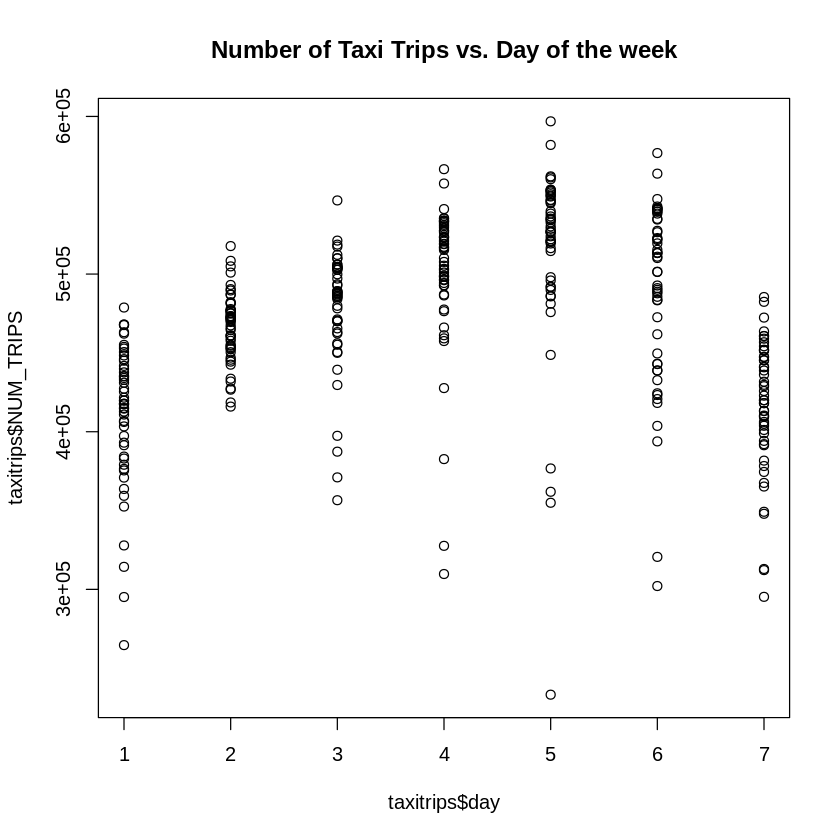

In [ ]:
plot(taxitrips$day, taxitrips$NUM_TRIPS, main="Number of Taxi Trips vs. Day of the week")

This is the data shown for Monday (1) to Sunday (7). The spread of the number of trips on a particular day is quite large and overlaps on almost any given day. However, one thing we can see, is that if Sunday is moved to the front i.e. Sunday (1) to Saturday (7), that there is the makings of a linear relationship. Perhaps with a bit of pruning things will be clearer.

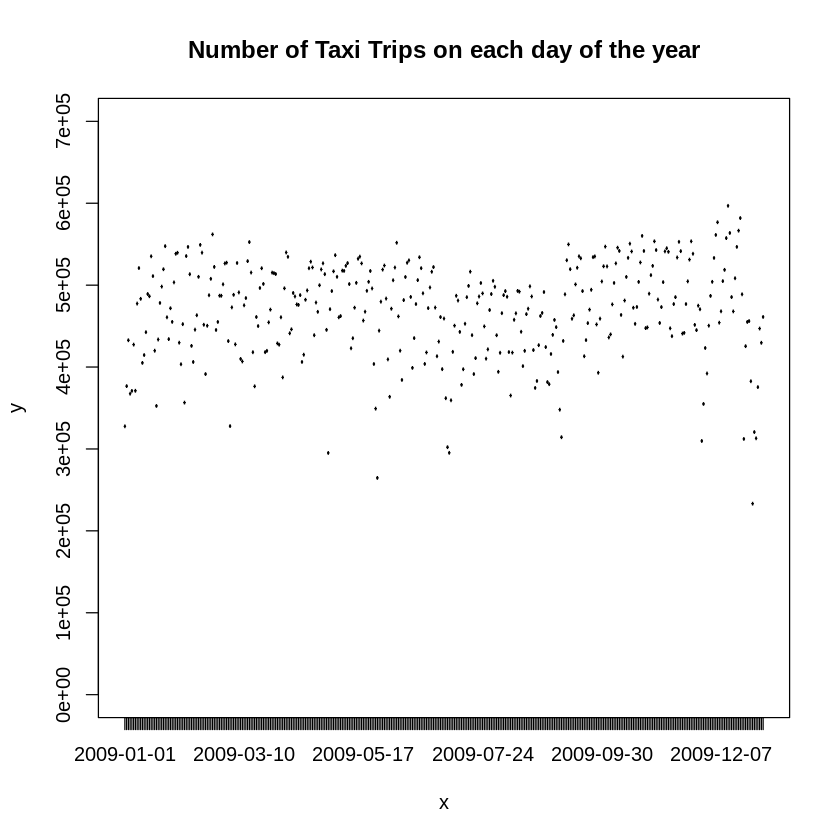

In [ ]:
plot(taxitrips$pickup_date, taxitrips$NUM_TRIPS, main="Number of Taxi Trips on each day of the year", ylim=c(0,700000))

This is just printing out the number of trips for each day in 2009. You can see a pattern where there are more trips from January to around June, then there is a drop until some point in September and a sudden drop over the Christmas holiday season. There are also a number of outliers, most likely caused by public holidays. 

In [ ]:
library(lattice)

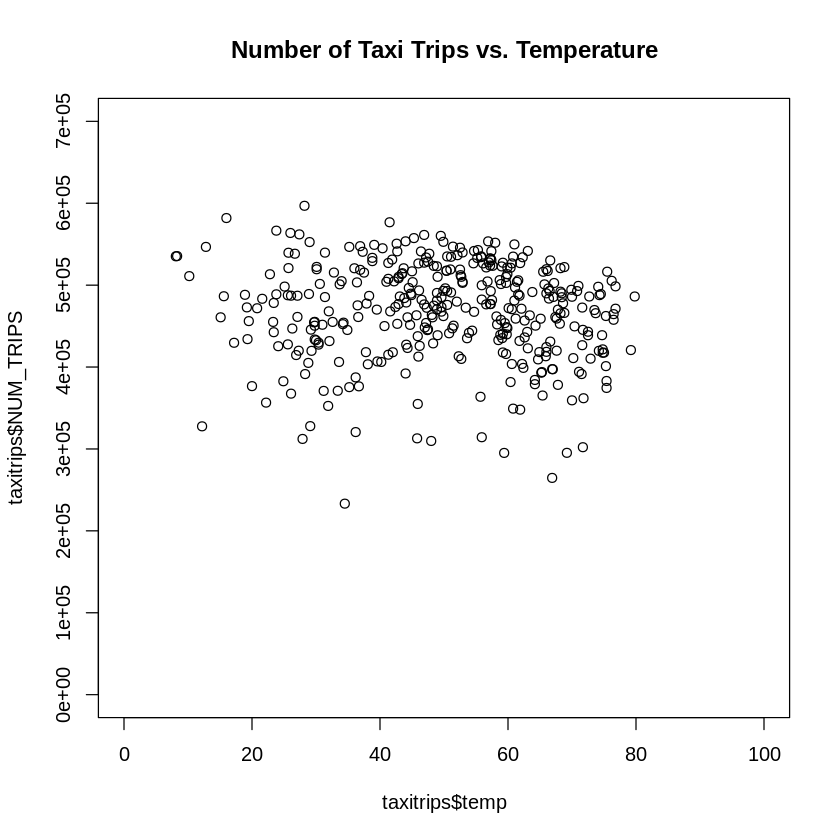

In [ ]:
plot(taxitrips$temp, taxitrips$NUM_TRIPS, main="Number of Taxi Trips vs. Temperature", xlim=c(0,100), ylim=c(0,700000))

In [ ]:
cor(taxitrips$temp, taxitrips$NUM_TRIPS)

[1] -0.08157505

There really isn't a linear correlation shown above for number of trips vs temperature, but, for the purposes of this tutorial, I am going to 'pretend' there is. Simply, as I want more than one column for the regressor.

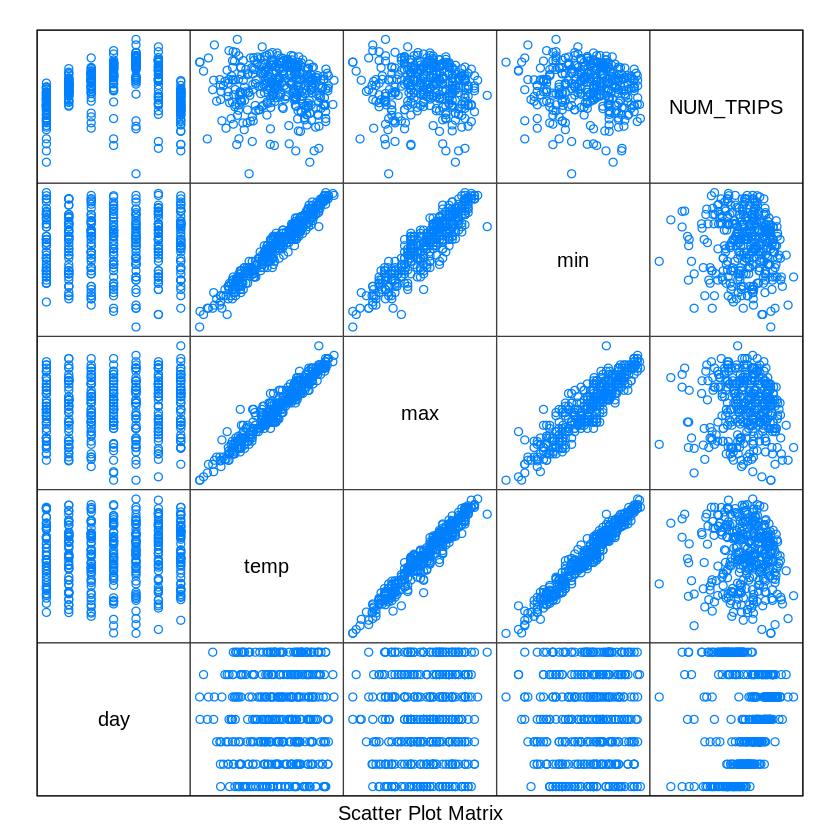

In [ ]:
splom(~ taxitrips[,c(1,6, 13, 14,18)], groups=NULL, data=taxitrips,
axis.line.tck=0, axis.text.alpha=0)

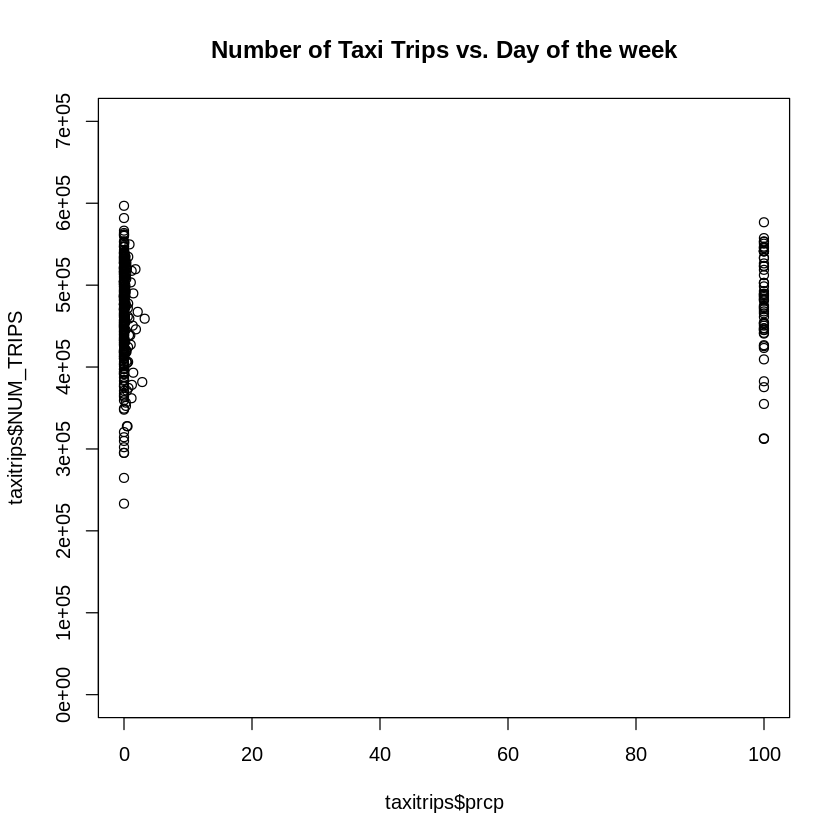

In [ ]:
plot(taxitrips$prcp, taxitrips$NUM_TRIPS, main="Number of Taxi Trips vs. Day of the week", xlim=c(0,100), ylim=c(0,700000))

Precipitation is problematic and we should probably set 99.99 to zero, but better look into it. 

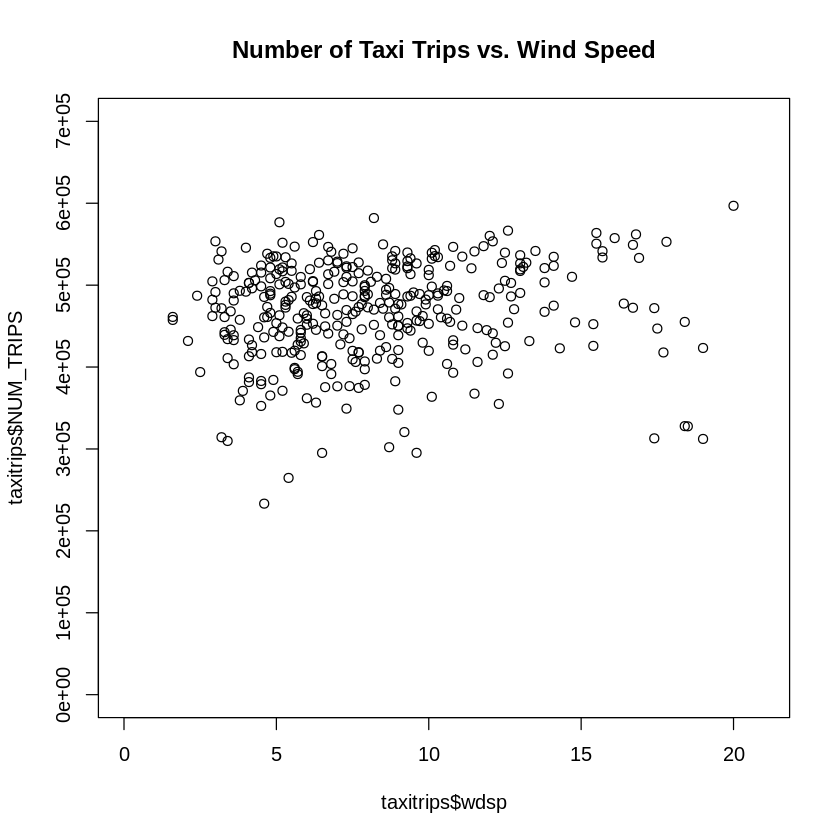

In [ ]:
plot(taxitrips$wdsp, taxitrips$NUM_TRIPS, main="Number of Taxi Trips vs. Wind Speed", xlim=c(0,21), ylim=c(0,700000))

In [ ]:
cor(taxitrips$wdsp, taxitrips$NUM_TRIPS)

[1] 0.1087199

Again, a very weak positive linear relationship, but for this tutorial we will use it. 

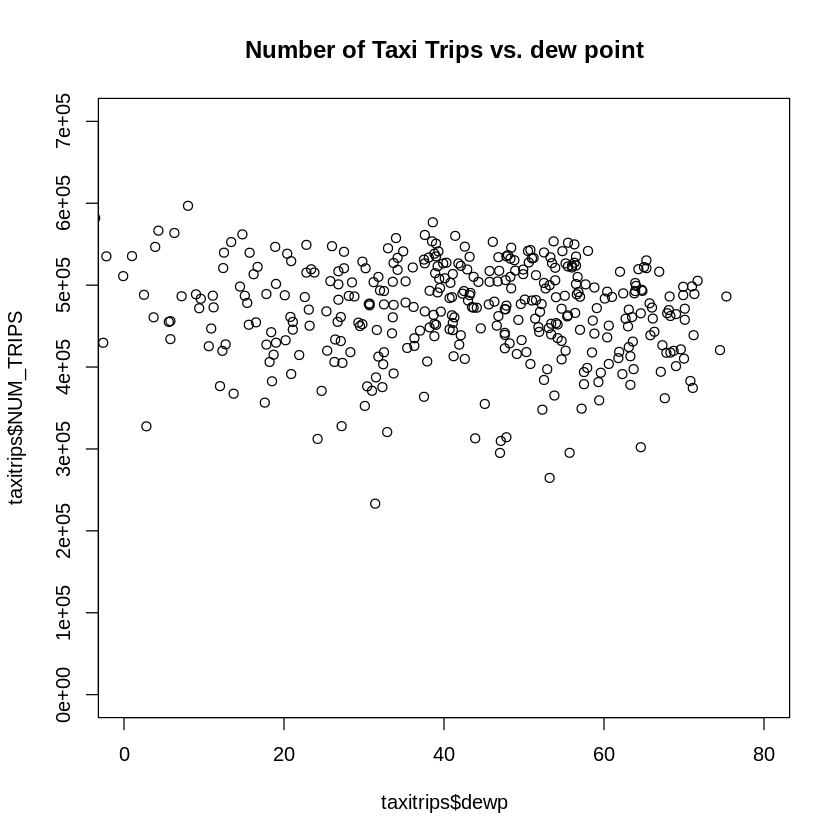

In [ ]:
plot(taxitrips$dewp, taxitrips$NUM_TRIPS, main="Number of Taxi Trips vs. dew point", xlim=c(0,80), ylim=c(0,700000))

In [ ]:
cor(taxitrips$dewp, taxitrips$NUM_TRIPS)

[1] -0.09689048

We will use the dew point as well. 

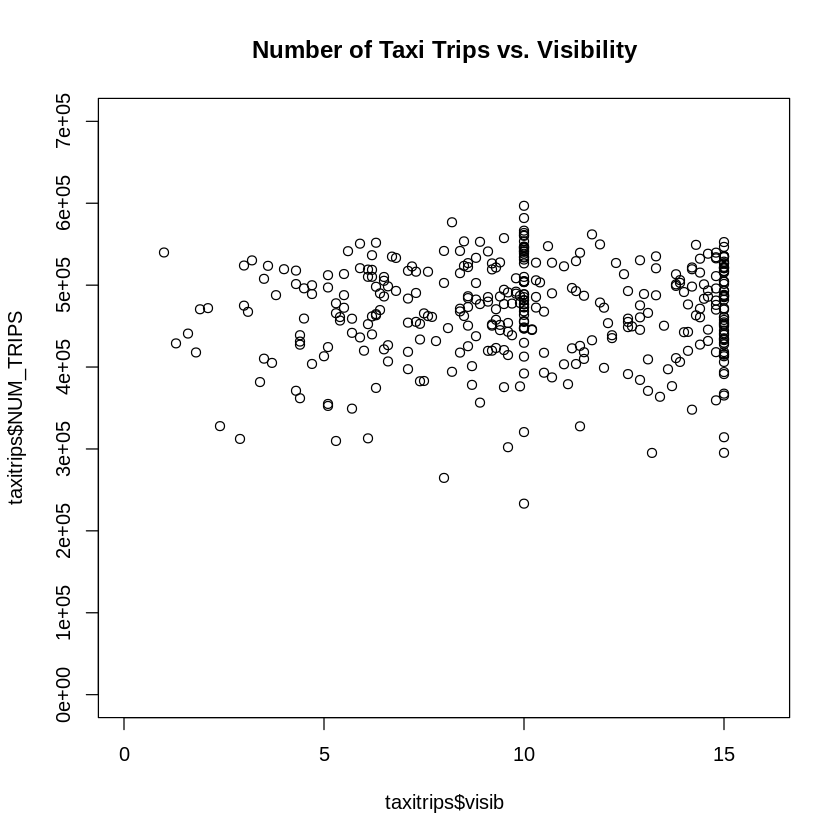

In [ ]:
plot(taxitrips$visib, taxitrips$NUM_TRIPS, main="Number of Taxi Trips vs. Visibility", xlim=c(0,16), ylim=c(0,700000))


In [ ]:
cor(taxitrips$visib, taxitrips$NUM_TRIPS)

[1] 0.04965198

We will ignore visibility. 

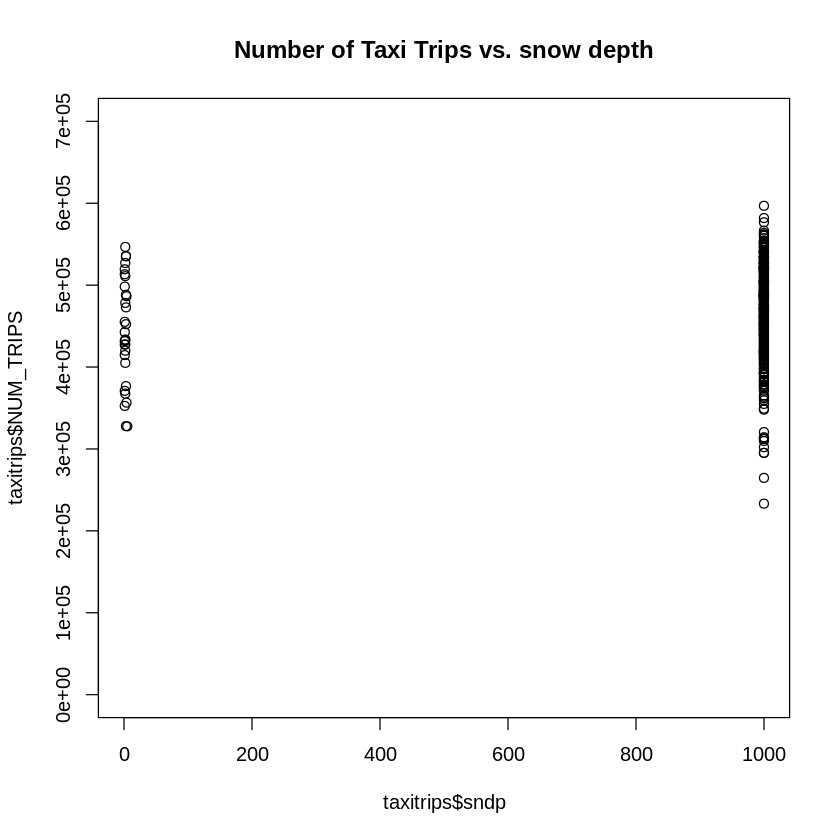

In [ ]:
plot(taxitrips$sndp, taxitrips$NUM_TRIPS, main="Number of Taxi Trips vs. snow depth", xlim=c(0,1000), ylim=c(0,700000))

We will ignore snow.

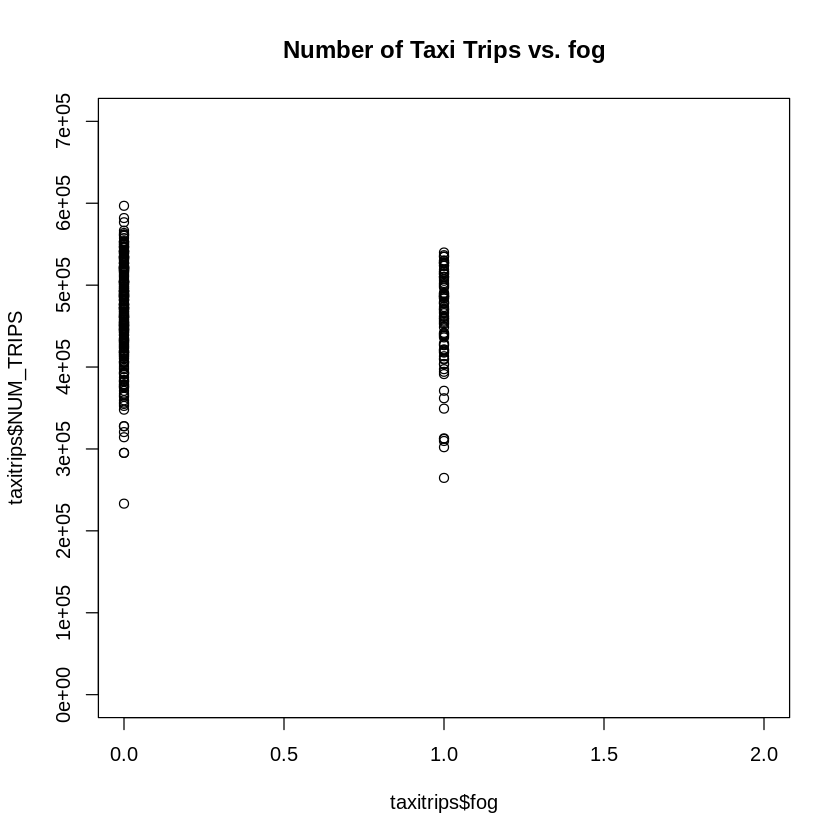

In [ ]:
plot(taxitrips$fog, taxitrips$NUM_TRIPS, main="Number of Taxi Trips vs. fog", xlim=c(0,2), ylim=c(0,700000))

We will also ignore fog. However, in the assignment these things may be useful.

At this point, I want to look at two different types of data from 2009 to 2011.

1. Collated weather and Taxi fare data (2009 - 2011) 
2. Taxi fare data (2009 - 2011)

The purpose of this seems a bit backwards, however, the initial part of this tutorial was to show you the kind of basic data analysis you can do. However, there are clearly many factors that you should look into. For example, it is unlikely that all areas of new york will require the same amount of taxi-fares on a given day. This could cause unreasonable amount variability where separate models can be used for different parts New York. 

For the linear models, a Saturday in August may have less taxi-trips than a Saturday in December. In fact, this can be seen quite clearly that the variability on a particular case may be extreme. So perhaps having different models for particular segments of the year may be better. We can check if this is the case by using data over a number of years and checking for seasonality.

In [ ]:
tt <- read.csv("https://raw.githubusercontent.com/rih28/1122131_DataAnalytics/master/results-20200722-185837.csv")

In [ ]:
head(tt)

,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,4,2009,1,1,2009-01-01,12.2,2.8,1012.6,11.4,18.5,26.0,33.0,21.2,5.0,0.55,5.1,0,327625
2,5,2009,1,2,2009-01-02,20.0,12.0,1015.5,13.7,7.4,20.0,21.0,39.9,5.0,0.00,3.1,0,376708
3,6,2009,1,3,2009-01-03,30.0,20.2,1007.1,11.7,10.8,18.1,24.1,35.1,26.6,0.00,2.0,0,432710
4,7,2009,1,4,2009-01-04,26.1,13.7,1012.4,15.0,11.5,17.1,24.1,35.6,21.2,0.00,2.0,0,367525
5,1,2009,1,5,2009-01-05,31.2,24.7,1012.2,13.1,3.9,8.9,999.9,41.0,19.4,0.00,1.2,0,370901
6,2,2009,1,6,2009-01-06,30.4,17.8,1015.4,14.4,5.7,12.0,999.9,35.6,26.6,0.00,1.2,0,427394


In [ ]:
summary(tt)

      day             year            mo               da       
 Min.   :1.000   Min.   :2009   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2009   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2010   Median : 7.000   Median :16.00  
 Mean   :4.003   Mean   :2010   Mean   : 6.526   Mean   :15.72  
 3rd Qu.:6.000   3rd Qu.:2011   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2011   Max.   :12.000   Max.   :31.00  
                                                                
     pickup_date        temp            dewp            slp         
 2009-01-01:   1   Min.   : 8.10   Min.   :-4.80   Min.   :  985.9  
 2009-01-02:   1   1st Qu.:40.30   1st Qu.:28.45   1st Qu.: 1012.9  
 2009-01-03:   1   Median :53.80   Median :43.60   Median : 1020.1  
 2009-01-04:   1   Mean   :52.71   Mean   :42.56   Mean   : 3911.7  
 2009-01-05:   1   3rd Qu.:66.25   3rd Qu.:57.90   3rd Qu.: 9999.9  
 2009-01-06:   1   Max.   :92.60   Max.   :75.30   Max.   : 9999.9

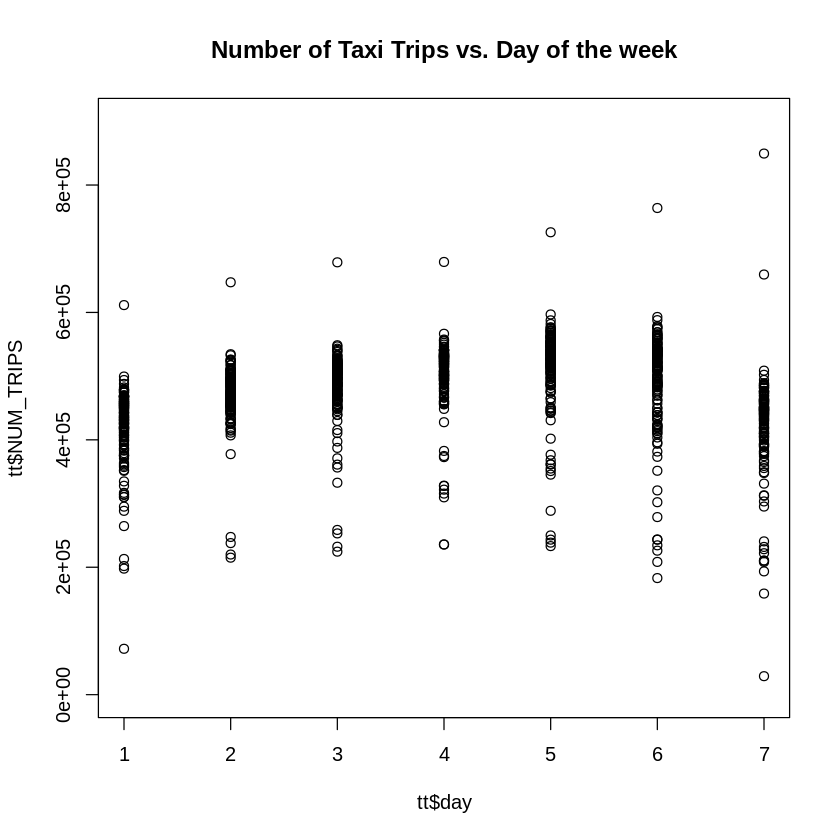

In [ ]:
plot(tt$day, tt$NUM_TRIPS, main="Number of Taxi Trips vs. Day of the week",  ylim=c(0,900000))

You can see here that variability per day has increased and there are some very clear examples of outliers. 

What we should probably do, is look at each year separately. 

In [ ]:
tt$pickup_date[0:365]

[1] 2009-01-01 2009-01-02 2009-01-03 2009-01-04 2009-01-05 2009-01-06
  [7] 2009-01-07 2009-01-08 2009-01-09 2009-01-10 2009-01-11 2009-01-12
 [13] 2009-01-13 2009-01-14 2009-01-15 2009-01-16 2009-01-17 2009-01-18
 [19] 2009-01-19 2009-01-20 2009-01-21 2009-01-22 2009-01-23 2009-01-24
 [25] 2009-01-25 2009-01-26 2009-01-27 2009-01-28 2009-01-29 2009-01-30
 [31] 2009-01-31 2009-02-01 2009-02-02 2009-02-03 2009-02-04 2009-02-05
 [37] 2009-02-06 2009-02-07 2009-02-08 2009-02-09 2009-02-10 2009-02-11
 [43] 2009-02-12 2009-02-13 2009-02-14 2009-02-15 2009-02-16 2009-02-17
 [49] 2009-02-18 2009-02-19 2009-02-20 2009-02-21 2009-02-22 2009-02-23
 [55] 2009-02-24 2009-02-25 2009-02-26 2009-02-27 2009-02-28 2009-03-01
 [61] 2009-03-02 2009-03-03 2009-03-04 2009-03-05 2009-03-06 2009-03-07
 [67] 2009-03-08 2009-03-09 2009-03-10 2009-03-11 2009-03-12 2009-03-13
 [73] 2009-03-14 2009-03-15 2009-03-16 2009-03-17 2009-03-18 2009-03-19
 [79] 2009-03-20 2009-03-21 2009-03-22 2009-03-23 2009-03-24 2009-03-25
 [85] 2009-03-26 2009-03-27 2009-03-28 2009-03-29 2009-03-30 2009-03-31
 [91] 2009-04-01 2009-04-02 2009-04-03 2009-04-04 2009-04-05 2009-04-06
 [97] 2009-04-07 2009-04-08 2009-04-09 2009-04-10 2009-04-11 2009-04-12
[103] 2009-04-13 2009-04-14 2009-04-15 2009-04-16 2009-04-17 2009-04-18
[109] 2009-04-19 2009-04-20 2009-04-21 2009-04-22 2009-04-23 2009-04-24
[115] 2009-04-25 2009-04-26 2009-04-27 2009-04-28 2009-04-29 2009-04-30
[121] 2009-05-01 2009-05-02 2009-05-03 2009-05-04 2009-05-05 2009-05-06
[127] 2009-05-07 2009-05-08 2009-05-09 2009-05-10 2009-05-11 2009-05-12
[133] 2009-05-13 2009-05-14 2009-05-15 2009-05-16 2009-05-17 2009-05-18
[139] 2009-05-19 2009-05-20 2009-05-21 2009-05-22 2009-05-23 2009-05-24
[145] 2009-05-25 2009-05-26 2009-05-27 2009-05-28 2009-05-29 2009-05-30
[151] 2009-05-31 2009-06-01 2009-06-02 2009-06-03 2009-06-04 2009-06-05
[157] 2009-06-06 2009-06-07 2009-06-08 2009-06-09 2009-06-10 2009-06-11
[163] 2009-06-12 2009-06-13 2009-06-14 2009-06-15 2009-06-16 2009-06-17
[169] 2009-06-18 2009-06-19 2009-06-20 2009-06-21 2009-06-22 2009-06-23
[175] 2009-06-24 2009-06-25 2009-06-26 2009-06-27 2009-06-28 2009-06-29
[181] 2009-06-30 2009-07-01 2009-07-02 2009-07-03 2009-07-04 2009-07-05
[187] 2009-07-06 2009-07-07 2009-07-08 2009-07-09 2009-07-10 2009-07-11
[193] 2009-07-12 2009-07-13 2009-07-14 2009-07-15 2009-07-16 2009-07-17
[199] 2009-07-18 2009-07-19 2009-07-20 2009-07-21 2009-07-22 2009-07-23
[205] 2009-07-24 2009-07-25 2009-07-26 2009-07-27 2009-07-28 2009-07-29
[211] 2009-07-30 2009-07-31 2009-08-01 2009-08-02 2009-08-03 2009-08-04
[217] 2009-08-05 2009-08-06 2009-08-07 2009-08-08 2009-08-09 2009-08-10
[223] 2009-08-11 2009-08-12 2009-08-13 2009-08-14 2009-08-15 2009-08-16
[229] 2009-08-17 2009-08-18 2009-08-19 2009-08-20 2009-08-21 2009-08-22
[235] 2009-08-23 2009-08-24 2009-08-25 2009-08-26 2009-08-27 2009-08-28
[241] 2009-08-29 2009-08-30 2009-08-31 2009-09-01 2009-09-02 2009-09-03
[247] 2009-09-04 2009-09-05 2009-09-06 2009-09-07 2009-09-08 2009-09-09
[253] 2009-09-10 2009-09-11 2009-09-12 2009-09-13 2009-09-14 2009-09-15
[259] 2009-09-16 2009-09-17 2009-09-18 2009-09-19 2009-09-20 2009-09-21
[265] 2009-09-22 2009-09-23 2009-09-24 2009-09-25 2009-09-26 2009-09-27
[271] 2009-09-28 2009-09-29 2009-09-30 2009-10-01 2009-10-02 2009-10-03
[277] 2009-10-04 2009-10-05 2009-10-06 2009-10-07 2009-10-08 2009-10-09
[283] 2009-10-10 2009-10-11 2009-10-12 2009-10-13 2009-10-14 2009-10-15
[289] 2009-10-16 2009-10-17 2009-10-18 2009-10-19 2009-10-20 2009-10-21
[295] 2009-10-22 2009-10-23 2009-10-24 2009-10-25 2009-10-26 2009-10-27
[301] 2009-10-28 2009-10-29 2009-10-30 2009-10-31 2009-11-01 2009-11-02
[307] 2009-11-03 2009-11-04 2009-11-05 2009-11-06 2009-11-07 2009-11-08
[313] 2009-11-09 2009-11-10 2009-11-11 2009-11-12 2009-11-13 2009-11-14
[319] 2009-11-15 2009-11-16 2009-11-17 2009-11-18 2009-11-19 2009-11-20
[325] 2009-11-21 2009-11-22 2009-11-23 2009-11-24 2009-11-25 2009-11-26
[331] 2009-11-27 2009-11-28 2009-11-29 200

This is for the first year i.e. first 365 days. The next is for 2010 and the next is for 2011.

In [ ]:
tt$pickup_date[366:730]

[1] 2010-01-01 2010-01-02 2010-01-03 2010-01-04 2010-01-05 2010-01-06
  [7] 2010-01-07 2010-01-08 2010-01-09 2010-01-10 2010-01-11 2010-01-12
 [13] 2010-01-13 2010-01-14 2010-01-15 2010-01-16 2010-01-17 2010-01-18
 [19] 2010-01-19 2010-01-20 2010-01-21 2010-01-22 2010-01-23 2010-01-24
 [25] 2010-01-25 2010-01-26 2010-01-27 2010-01-28 2010-01-29 2010-01-30
 [31] 2010-01-31 2010-02-01 2010-02-02 2010-02-03 2010-02-04 2010-02-05
 [37] 2010-02-06 2010-02-07 2010-02-08 2010-02-09 2010-02-10 2010-02-11
 [43] 2010-02-12 2010-02-13 2010-02-14 2010-02-15 2010-02-16 2010-02-17
 [49] 2010-02-18 2010-02-19 2010-02-20 2010-02-21 2010-02-22 2010-02-23
 [55] 2010-02-24 2010-02-25 2010-02-26 2010-02-27 2010-02-28 2010-03-01
 [61] 2010-03-02 2010-03-03 2010-03-04 2010-03-05 2010-03-06 2010-03-07
 [67] 2010-03-08 2010-03-09 2010-03-10 2010-03-11 2010-03-12 2010-03-13
 [73] 2010-03-14 2010-03-15 2010-03-16 2010-03-17 2010-03-18 2010-03-19
 [79] 2010-03-20 2010-03-21 2010-03-22 2010-03-23 2010-03-24 2010-03-25
 [85] 2010-03-26 2010-03-27 2010-03-28 2010-03-29 2010-03-30 2010-03-31
 [91] 2010-04-01 2010-04-02 2010-04-03 2010-04-04 2010-04-05 2010-04-06
 [97] 2010-04-07 2010-04-08 2010-04-09 2010-04-10 2010-04-11 2010-04-12
[103] 2010-04-13 2010-04-14 2010-04-15 2010-04-16 2010-04-17 2010-04-18
[109] 2010-04-19 2010-04-20 2010-04-21 2010-04-22 2010-04-23 2010-04-24
[115] 2010-04-25 2010-04-26 2010-04-27 2010-04-28 2010-04-29 2010-04-30
[121] 2010-05-01 2010-05-02 2010-05-03 2010-05-04 2010-05-05 2010-05-06
[127] 2010-05-07 2010-05-08 2010-05-09 2010-05-10 2010-05-11 2010-05-12
[133] 2010-05-13 2010-05-14 2010-05-15 2010-05-16 2010-05-17 2010-05-18
[139] 2010-05-19 2010-05-20 2010-05-21 2010-05-22 2010-05-23 2010-05-24
[145] 2010-05-25 2010-05-26 2010-05-27 2010-05-28 2010-05-29 2010-05-30
[151] 2010-05-31 2010-06-01 2010-06-02 2010-06-03 2010-06-04 2010-06-05
[157] 2010-06-06 2010-06-07 2010-06-08 2010-06-09 2010-06-10 2010-06-11
[163] 2010-06-12 2010-06-13 2010-06-14 2010-06-15 2010-06-16 2010-06-17
[169] 2010-06-18 2010-06-19 2010-06-20 2010-06-21 2010-06-22 2010-06-23
[175] 2010-06-24 2010-06-25 2010-06-26 2010-06-27 2010-06-28 2010-06-29
[181] 2010-06-30 2010-07-01 2010-07-02 2010-07-03 2010-07-04 2010-07-05
[187] 2010-07-06 2010-07-07 2010-07-08 2010-07-09 2010-07-10 2010-07-11
[193] 2010-07-12 2010-07-13 2010-07-14 2010-07-15 2010-07-16 2010-07-17
[199] 2010-07-18 2010-07-19 2010-07-20 2010-07-21 2010-07-22 2010-07-23
[205] 2010-07-24 2010-07-25 2010-07-26 2010-07-27 2010-07-28 2010-07-29
[211] 2010-07-30 2010-07-31 2010-08-01 2010-08-02 2010-08-03 2010-08-04
[217] 2010-08-05 2010-08-06 2010-08-07 2010-08-08 2010-08-09 2010-08-10
[223] 2010-08-11 2010-08-12 2010-08-13 2010-08-14 2010-08-15 2010-08-16
[229] 2010-08-17 2010-08-18 2010-08-19 2010-08-20 2010-08-21 2010-08-22
[235] 2010-08-23 2010-08-24 2010-08-25 2010-08-26 2010-08-27 2010-08-28
[241] 2010-08-29 2010-08-30 2010-08-31 2010-09-01 2010-09-02 2010-09-03
[247] 2010-09-04 2010-09-05 2010-09-06 2010-09-07 2010-09-08 2010-09-09
[253] 2010-09-10 2010-09-11 2010-09-12 2010-09-13 2010-09-14 2010-09-15
[259] 2010-09-16 2010-09-17 2010-09-18 2010-09-19 2010-09-20 2010-09-21
[265] 2010-09-22 2010-09-23 2010-09-24 2010-09-25 2010-09-26 2010-09-27
[271] 2010-09-28 2010-09-29 2010-09-30 2010-10-01 2010-10-02 2010-10-03
[277] 2010-10-04 2010-10-05 2010-10-06 2010-10-07 2010-10-08 2010-10-09
[283] 2010-10-10 2010-10-11 2010-10-12 2010-10-13 2010-10-14 2010-10-15
[289] 2010-10-16 2010-10-17 2010-10-18 2010-10-19 2010-10-20 2010-10-21
[295] 2010-10-22 2010-10-23 2010-10-24 2010-10-25 2010-10-26 2010-10-27
[301] 2010-10-28 2010-10-29 2010-10-30 2010-10-31 2010-11-01 2010-11-02
[307] 2010-11-03 2010-11-04 2010-11-05 2010-11-06 2010-11-07 2010-11-08
[313] 2010-11-09 2010-11-10 2010-11-11 2010-11-12 2010-11-13 2010-11-14
[319] 2010-11-15 2010-11-16 2010-11-17 2010-11-18 2010-11-19 2010-11-20
[325] 2010-11-21 2010-11-22 2010-11-23 2010-11-24 2010-11-25 2010-11-26
[331] 2010-11-27 2010-11-28 2010-11-29 201

In [ ]:
tt$pickup_date[731:1095]

[1] 2011-01-01 2011-01-02 2011-01-03 2011-01-04 2011-01-05 2011-01-06
  [7] 2011-01-07 2011-01-08 2011-01-09 2011-01-10 2011-01-11 2011-01-12
 [13] 2011-01-13 2011-01-14 2011-01-15 2011-01-16 2011-01-17 2011-01-18
 [19] 2011-01-19 2011-01-20 2011-01-21 2011-01-22 2011-01-23 2011-01-24
 [25] 2011-01-25 2011-01-26 2011-01-27 2011-01-28 2011-01-29 2011-01-30
 [31] 2011-01-31 2011-02-01 2011-02-02 2011-02-03 2011-02-04 2011-02-05
 [37] 2011-02-06 2011-02-07 2011-02-08 2011-02-09 2011-02-10 2011-02-11
 [43] 2011-02-12 2011-02-13 2011-02-14 2011-02-15 2011-02-16 2011-02-17
 [49] 2011-02-18 2011-02-19 2011-02-20 2011-02-21 2011-02-22 2011-02-23
 [55] 2011-02-24 2011-02-25 2011-02-26 2011-02-27 2011-02-28 2011-03-01
 [61] 2011-03-02 2011-03-03 2011-03-04 2011-03-05 2011-03-06 2011-03-07
 [67] 2011-03-08 2011-03-09 2011-03-10 2011-03-11 2011-03-12 2011-03-13
 [73] 2011-03-14 2011-03-15 2011-03-16 2011-03-17 2011-03-18 2011-03-19
 [79] 2011-03-20 2011-03-21 2011-03-22 2011-03-23 2011-03-24 2011-03-25
 [85] 2011-03-26 2011-03-27 2011-03-28 2011-03-29 2011-03-30 2011-03-31
 [91] 2011-04-01 2011-04-02 2011-04-03 2011-04-04 2011-04-05 2011-04-06
 [97] 2011-04-07 2011-04-08 2011-04-09 2011-04-10 2011-04-11 2011-04-12
[103] 2011-04-13 2011-04-14 2011-04-15 2011-04-16 2011-04-17 2011-04-18
[109] 2011-04-19 2011-04-20 2011-04-21 2011-04-22 2011-04-23 2011-04-24
[115] 2011-04-25 2011-04-26 2011-04-27 2011-04-28 2011-04-29 2011-04-30
[121] 2011-05-01 2011-05-02 2011-05-03 2011-05-04 2011-05-05 2011-05-06
[127] 2011-05-07 2011-05-08 2011-05-09 2011-05-10 2011-05-11 2011-05-12
[133] 2011-05-13 2011-05-14 2011-05-15 2011-05-16 2011-05-17 2011-05-18
[139] 2011-05-19 2011-05-20 2011-05-21 2011-05-22 2011-05-23 2011-05-24
[145] 2011-05-25 2011-05-26 2011-05-27 2011-05-28 2011-05-29 2011-05-30
[151] 2011-05-31 2011-06-01 2011-06-02 2011-06-03 2011-06-04 2011-06-05
[157] 2011-06-06 2011-06-07 2011-06-08 2011-06-09 2011-06-10 2011-06-11
[163] 2011-06-12 2011-06-13 2011-06-14 2011-06-15 2011-06-16 2011-06-17
[169] 2011-06-18 2011-06-19 2011-06-20 2011-06-21 2011-06-22 2011-06-23
[175] 2011-06-24 2011-06-25 2011-06-26 2011-06-27 2011-06-28 2011-06-29
[181] 2011-06-30 2011-07-01 2011-07-02 2011-07-03 2011-07-04 2011-07-05
[187] 2011-07-06 2011-07-07 2011-07-08 2011-07-09 2011-07-10 2011-07-11
[193] 2011-07-12 2011-07-13 2011-07-14 2011-07-15 2011-07-16 2011-07-17
[199] 2011-07-18 2011-07-19 2011-07-20 2011-07-21 2011-07-22 2011-07-23
[205] 2011-07-24 2011-07-25 2011-07-26 2011-07-27 2011-07-28 2011-07-29
[211] 2011-07-30 2011-07-31 2011-08-01 2011-08-02 2011-08-03 2011-08-04
[217] 2011-08-05 2011-08-06 2011-08-07 2011-08-08 2011-08-09 2011-08-10
[223] 2011-08-11 2011-08-12 2011-08-13 2011-08-14 2011-08-15 2011-08-16
[229] 2011-08-17 2011-08-18 2011-08-19 2011-08-20 2011-08-21 2011-08-22
[235] 2011-08-23 2011-08-24 2011-08-25 2011-08-26 2011-08-27 2011-08-28
[241] 2011-08-29 2011-08-30 2011-08-31 2011-09-01 2011-09-02 2011-09-03
[247] 2011-09-04 2011-09-05 2011-09-06 2011-09-07 2011-09-08 2011-09-09
[253] 2011-09-10 2011-09-11 2011-09-12 2011-09-13 2011-09-14 2011-09-15
[259] 2011-09-16 2011-09-17 2011-09-18 2011-09-19 2011-09-20 2011-09-21
[265] 2011-09-22 2011-09-23 2011-09-24 2011-09-25 2011-09-26 2011-09-27
[271] 2011-09-28 2011-09-29 2011-09-30 2011-10-01 2011-10-02 2011-10-03
[277] 2011-10-04 2011-10-05 2011-10-06 2011-10-07 2011-10-08 2011-10-09
[283] 2011-10-10 2011-10-11 2011-10-12 2011-10-13 2011-10-14 2011-10-15
[289] 2011-10-16 2011-10-17 2011-10-18 2011-10-19 2011-10-20 2011-10-21
[295] 2011-10-22 2011-10-23 2011-10-24 2011-10-25 2011-10-26 2011-10-27
[301] 2011-10-28 2011-10-29 2011-10-30 2011-10-31 2011-11-01 2011-11-02
[307] 2011-11-03 2011-11-04 2011-11-05 2011-11-06 2011-11-07 2011-11-08
[313] 2011-11-09 2011-11-10 2011-11-11 2011-11-12 2011-11-13 2011-11-14
[319] 2011-11-15 2011-11-16 2011-11-17 2011-11-18 2011-11-19 2011-11-20
[325] 2011-11-21 2011-11-22 2011-11-23 2011-11-24 2011-11-25 2011-11-26
[331] 2011-11-27 2011-11-28 2011-11-29 201

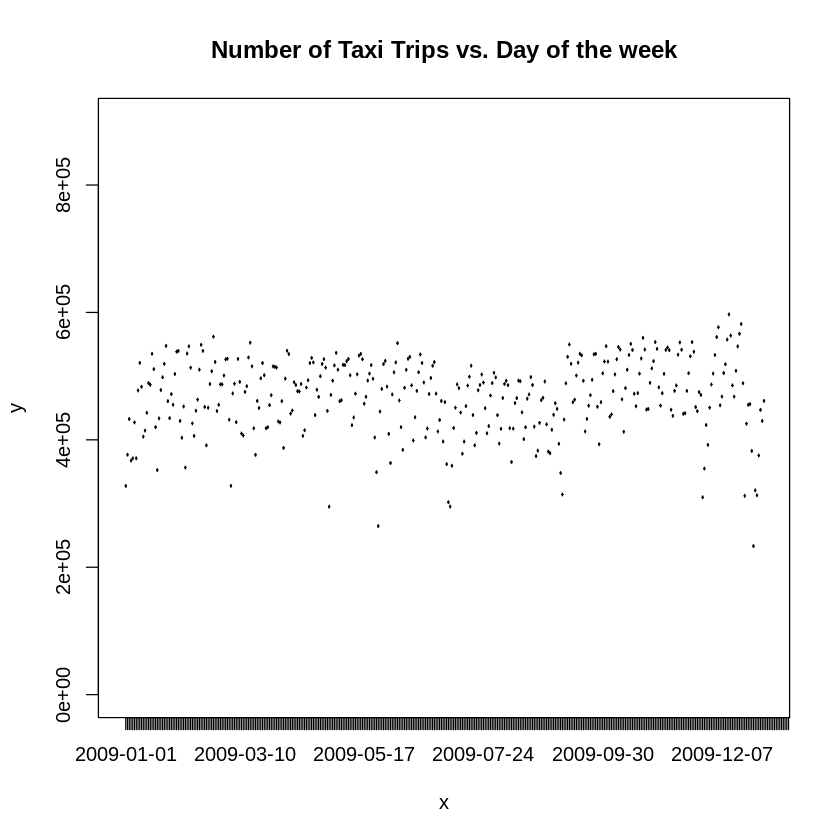

In [ ]:
plot(tt$pickup_date[0:365], tt$NUM_TRIPS[0:365], main="Number of Taxi Trips vs. Day of the week", xlim=c(0, 365), ylim=c(0,900000))

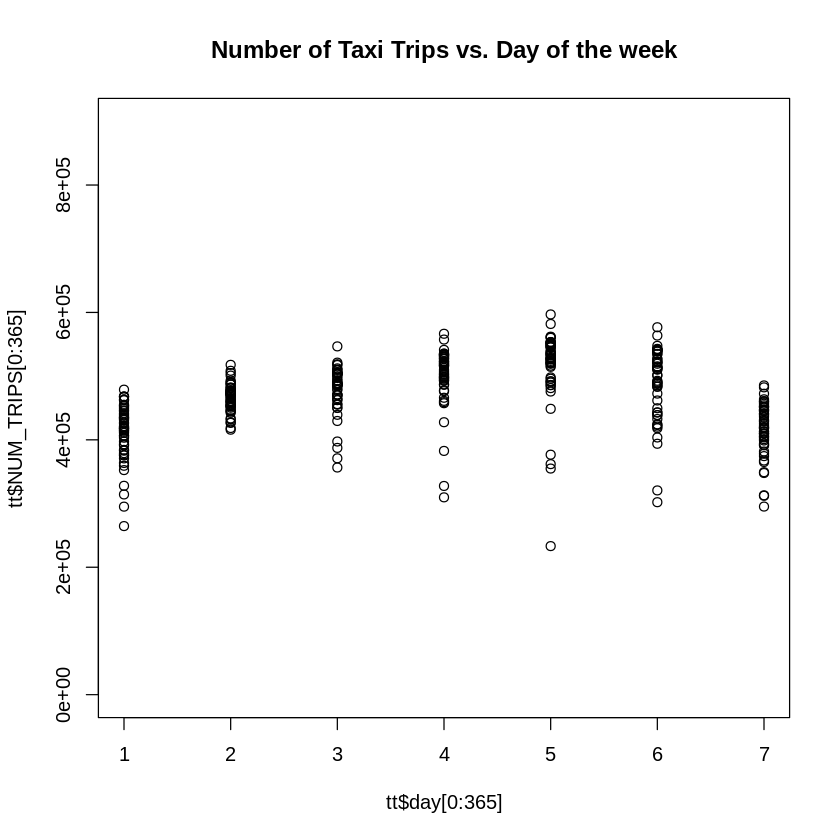

In [ ]:
plot(tt$day[0:365], tt$NUM_TRIPS[0:365], main="Number of Taxi Trips vs. Day of the week",  ylim=c(0,900000))

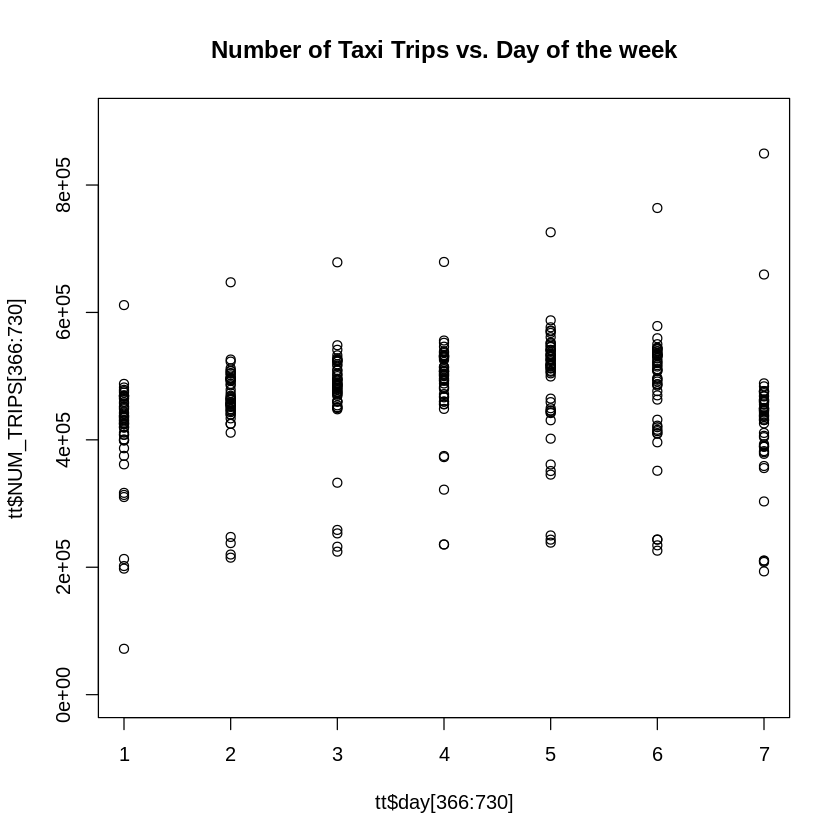

In [ ]:
plot(tt$day[366:730], tt$NUM_TRIPS[366:730], main="Number of Taxi Trips vs. Day of the week",  ylim=c(0,900000))

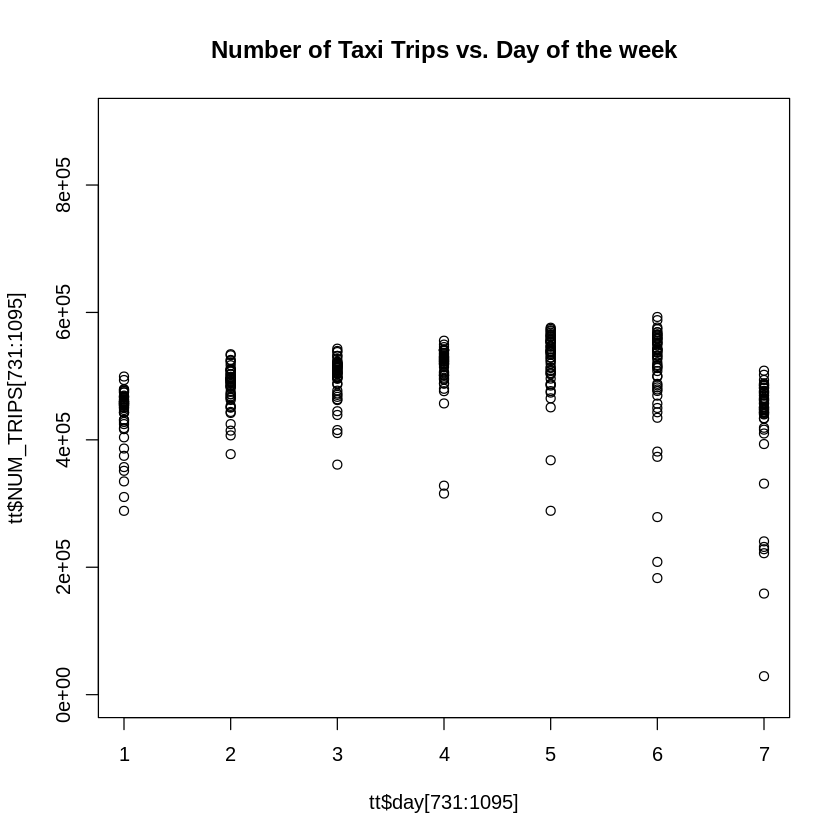

In [ ]:
plot(tt$day[731:1095], tt$NUM_TRIPS[731:1095], main="Number of Taxi Trips vs. Day of the week",  ylim=c(0,900000))

In [ ]:
summary(tt$NUM_TRIPS[0:365])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 233221  432885  475873  468208  513575  596882 

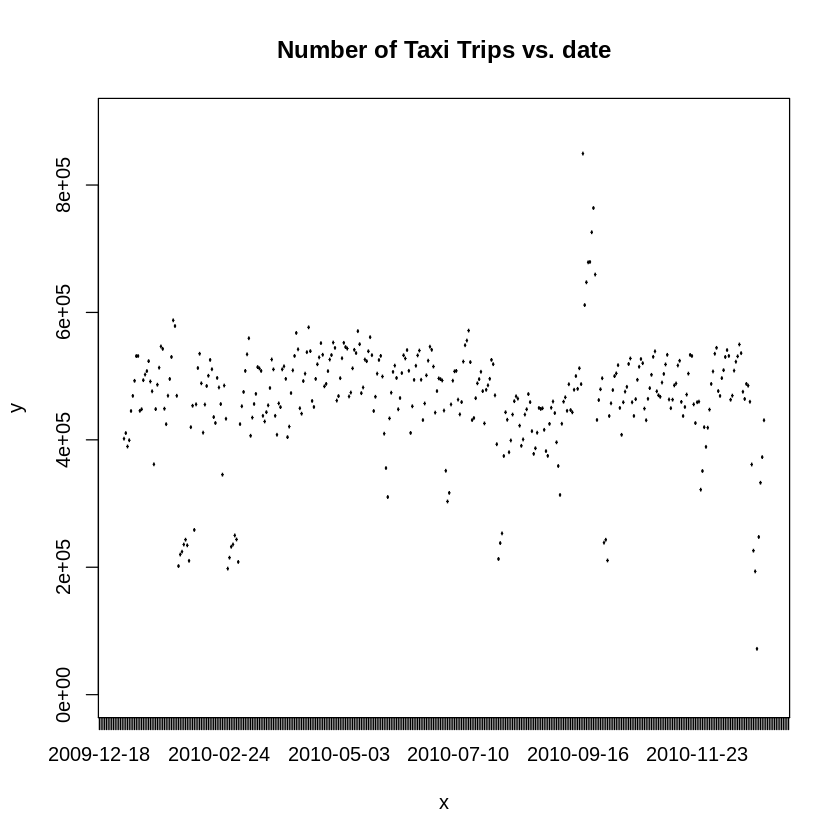

In [ ]:
plot(tt$pickup_date[366:730], tt$NUM_TRIPS[366:730], main="Number of Taxi Trips vs. date", xlim=c(366, 730), ylim=c(0,900000))

Here you can see that there has clearly been something odd going on around mid september. We should look to remove these from the data eventually.

In [ ]:
summary(tt$NUM_TRIPS[366:730])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  72025  437508  474256  462998  514747  849414 

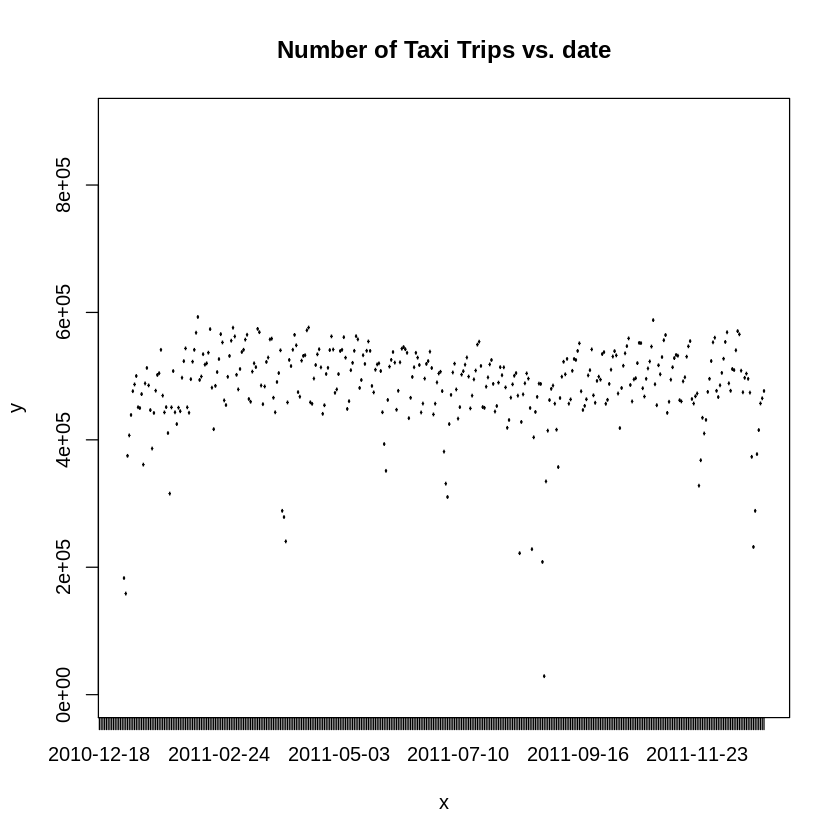

In [ ]:
plot(tt$pickup_date[731:1095], tt$NUM_TRIPS[731:1095], main="Number of Taxi Trips vs. date", xlim=c(731, 1095), ylim=c(0,900000))

I mentioned earlier a seasonal pattern, which can now be seen when we print the number of trips for each day in a year. 

In [ ]:
summary(tt$NUM_TRIPS[731:1095])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29028  459835  496251  484650  526982  592896 

I think it would be interesting to chose a relatively stable part of the data i.e. a subset of one of the seasonal patterns. 2010 has less values due to the weird erroneous outliers in September but as you will see below, the variability is reduced when data points are taken from a particular time of each year.

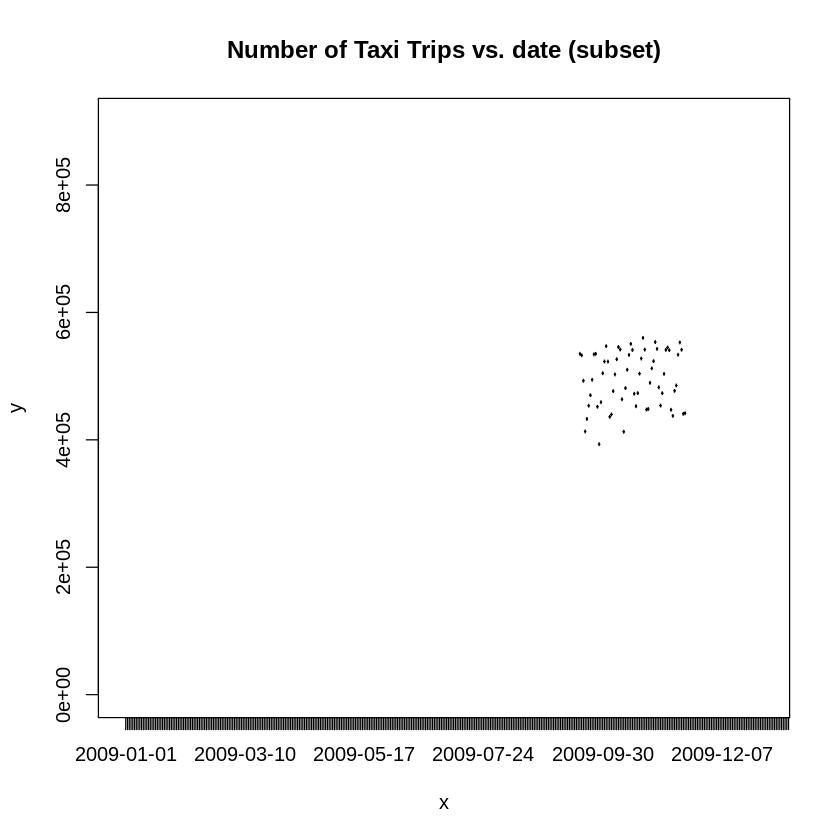

In [ ]:
plot(tt$pickup_date[260:320], tt$NUM_TRIPS[260:320], main="Number of Taxi Trips vs. date (subset)", xlim=c(0, 365), ylim=c(0,900000))

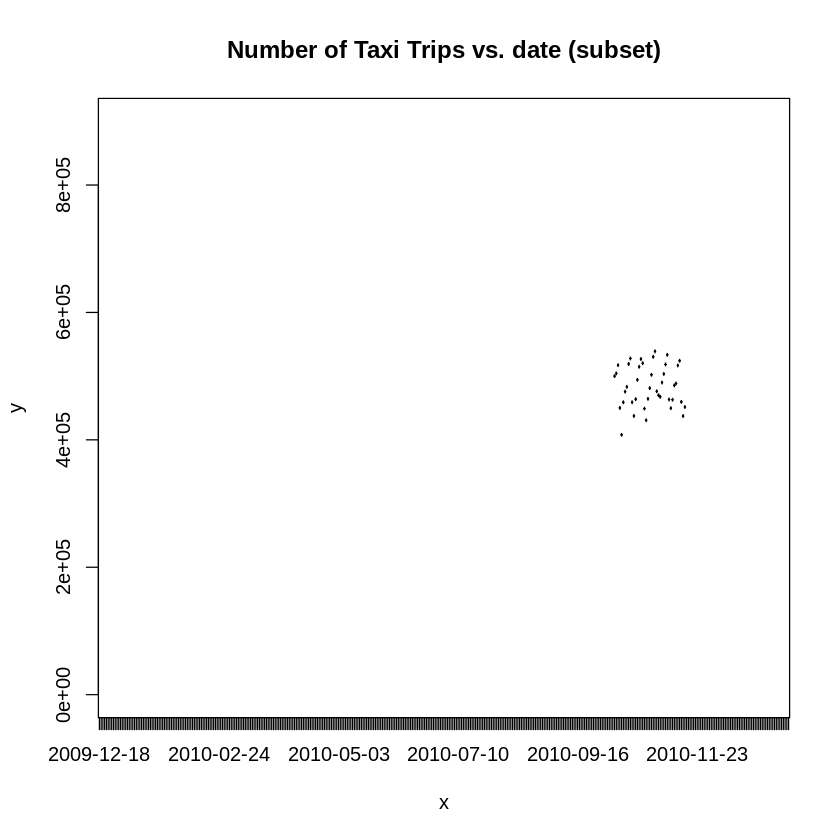

In [ ]:
plot(tt$pickup_date[645:685], tt$NUM_TRIPS[645:685], main="Number of Taxi Trips vs. date (subset)", xlim=c(366, 730), ylim=c(0,900000))

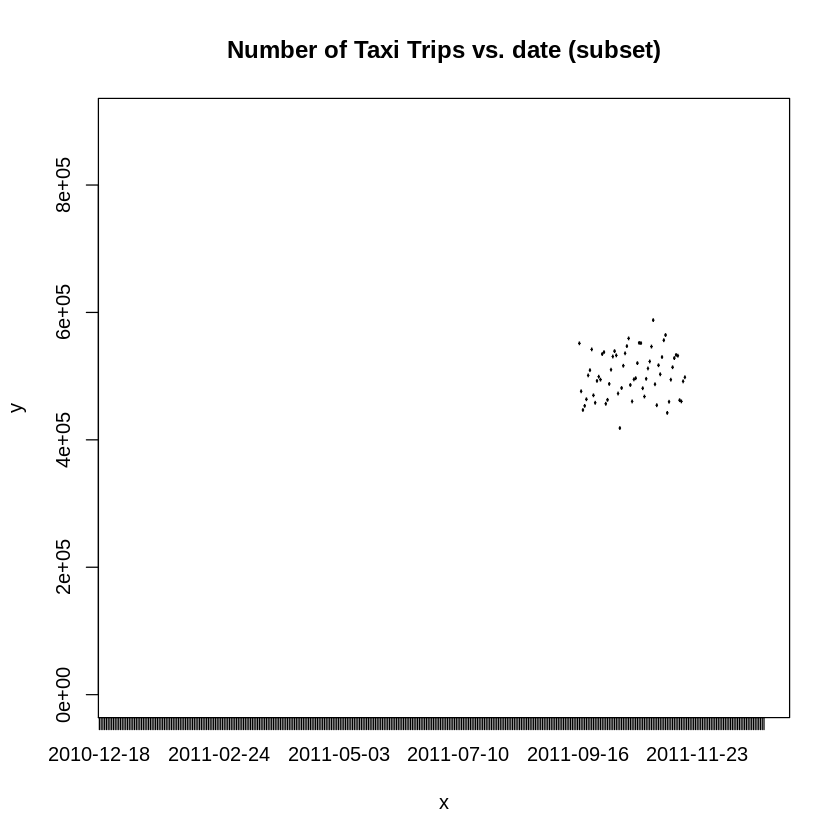

In [ ]:
plot(tt$pickup_date[990:1050], tt$NUM_TRIPS[990:1050], main="Number of Taxi Trips vs. date (subset)", xlim=c(731, 1095), ylim=c(0,900000))

When we plot number of trips against days of the week for these subsets shows something that has a 'kind of' linear relationship (if we made sunday the first day of the week).

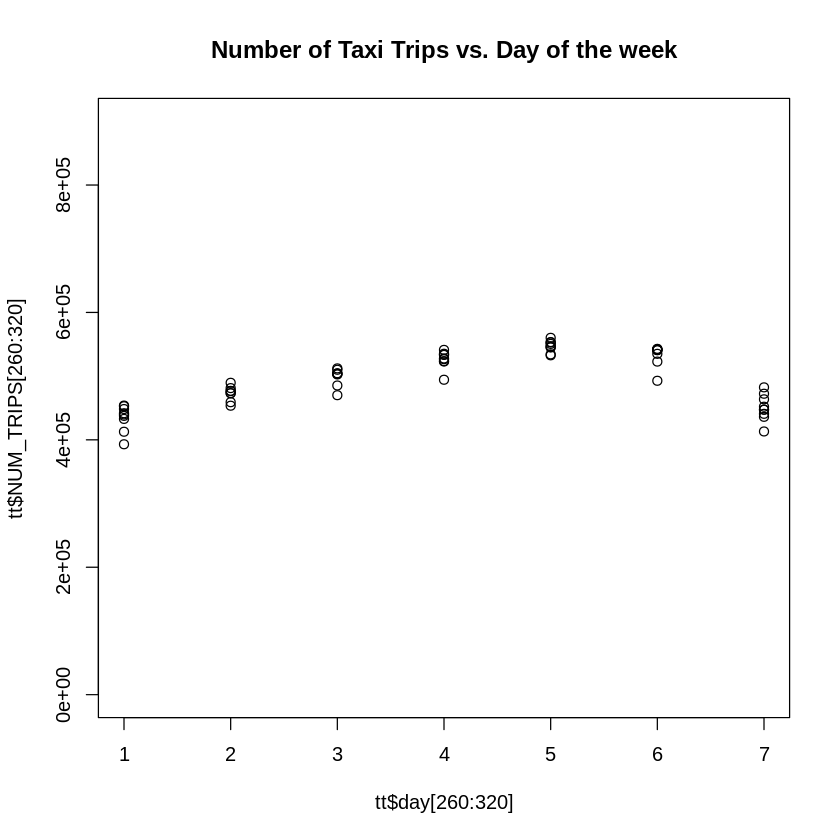

In [ ]:
plot(tt$day[260:320], tt$NUM_TRIPS[260:320], main="Number of Taxi Trips vs. Day of the week",  ylim=c(0,900000))

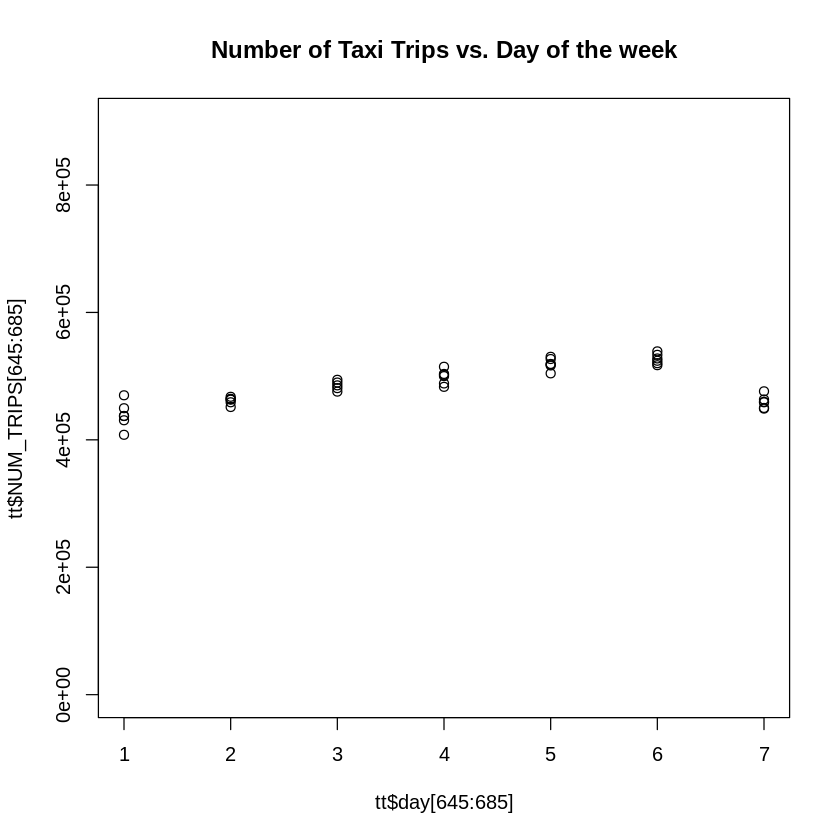

In [ ]:
plot(tt$day[645:685], tt$NUM_TRIPS[645:685], main="Number of Taxi Trips vs. Day of the week", ylim=c(0,900000))

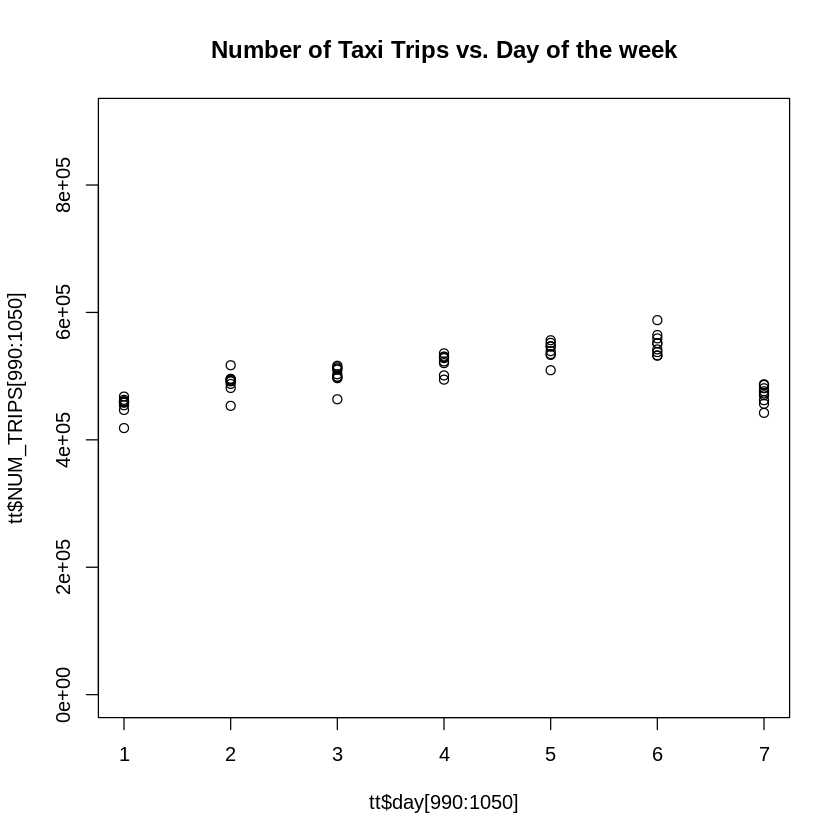

In [ ]:
plot(tt$day[990:1050], tt$NUM_TRIPS[990:1050], main="Number of Taxi Trips vs. Day of the week",  ylim=c(0,900000))

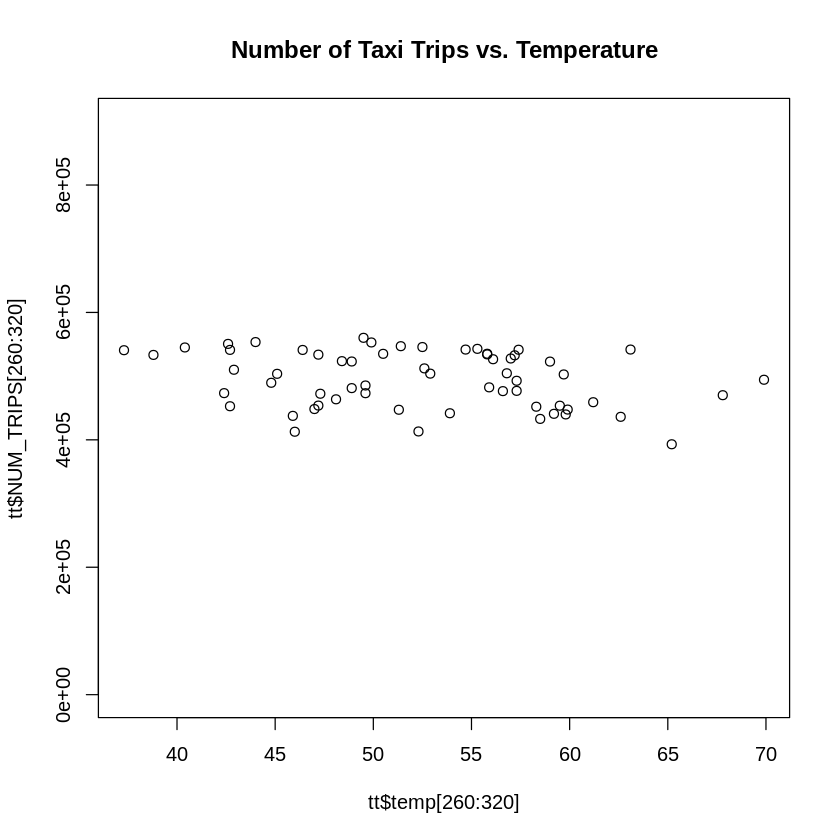

In [ ]:
plot(tt$temp[260:320], tt$NUM_TRIPS[260:320], main="Number of Taxi Trips vs. Temperature",  ylim=c(0,900000))

In [ ]:
cor(tt$temp[260:320], tt$NUM_TRIPS[260:320])

[1] -0.2729205

It can also be shown that there is a stronger linear correlation between temperature and number of trips within this subset. 

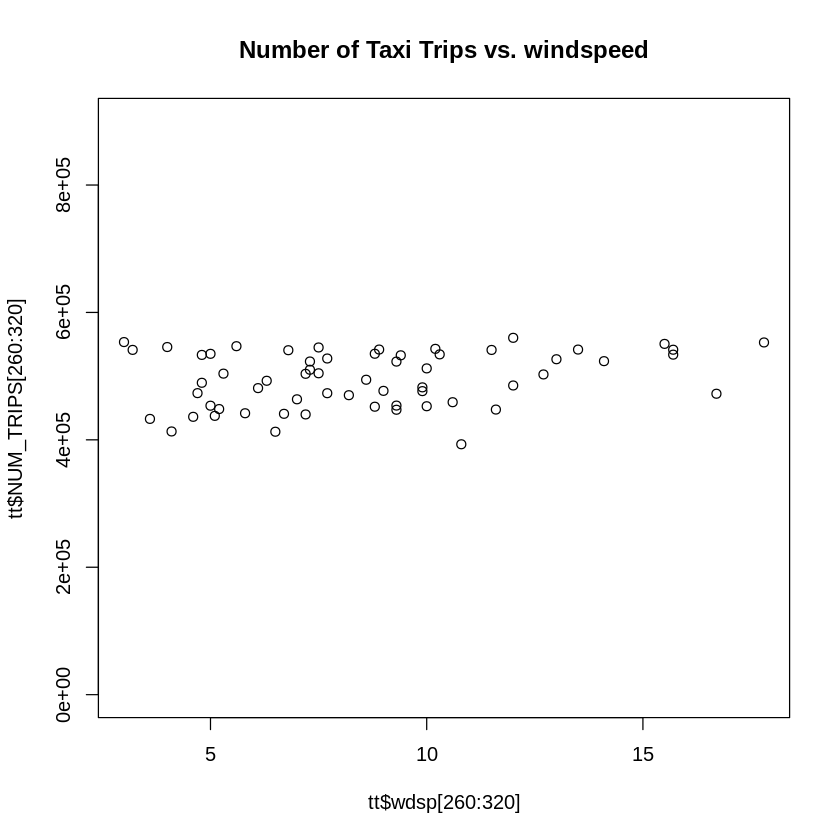

In [ ]:
plot(tt$wdsp[260:320], tt$NUM_TRIPS[260:320], main="Number of Taxi Trips vs. windspeed",  ylim=c(0,900000))

In [ ]:
cor(tt$wdsp[260:320], tt$NUM_TRIPS[260:320])

[1] 0.2649034

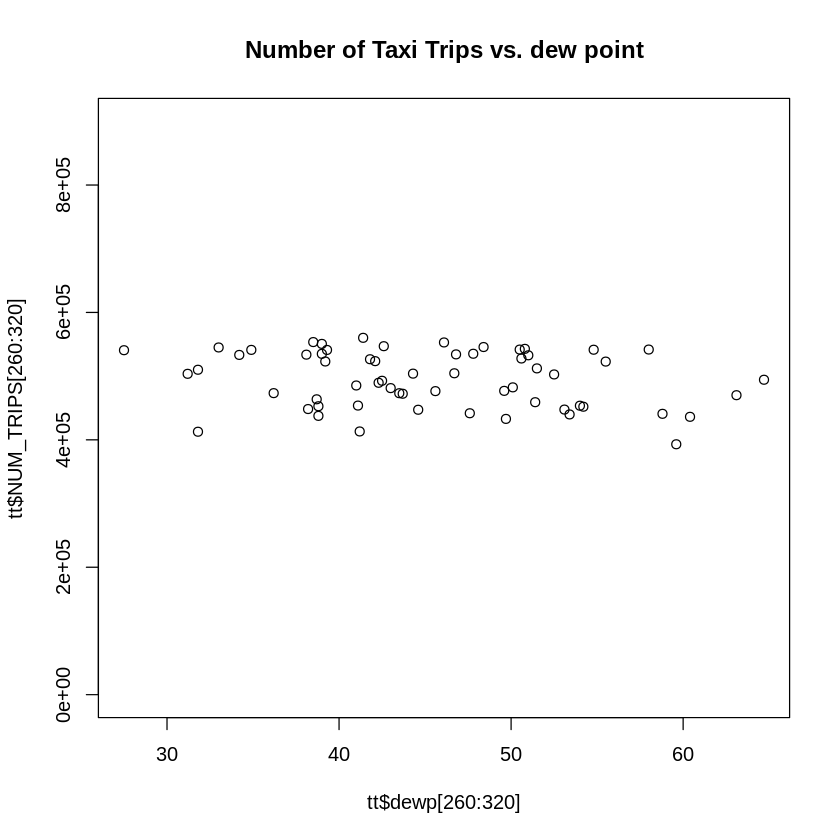

In [ ]:
plot(tt$dewp[260:320], tt$NUM_TRIPS[260:320], main="Number of Taxi Trips vs. dew point",  ylim=c(0,900000))

In [ ]:
cor(tt$dewp[260:320], tt$NUM_TRIPS[260:320])

[1] -0.2239346

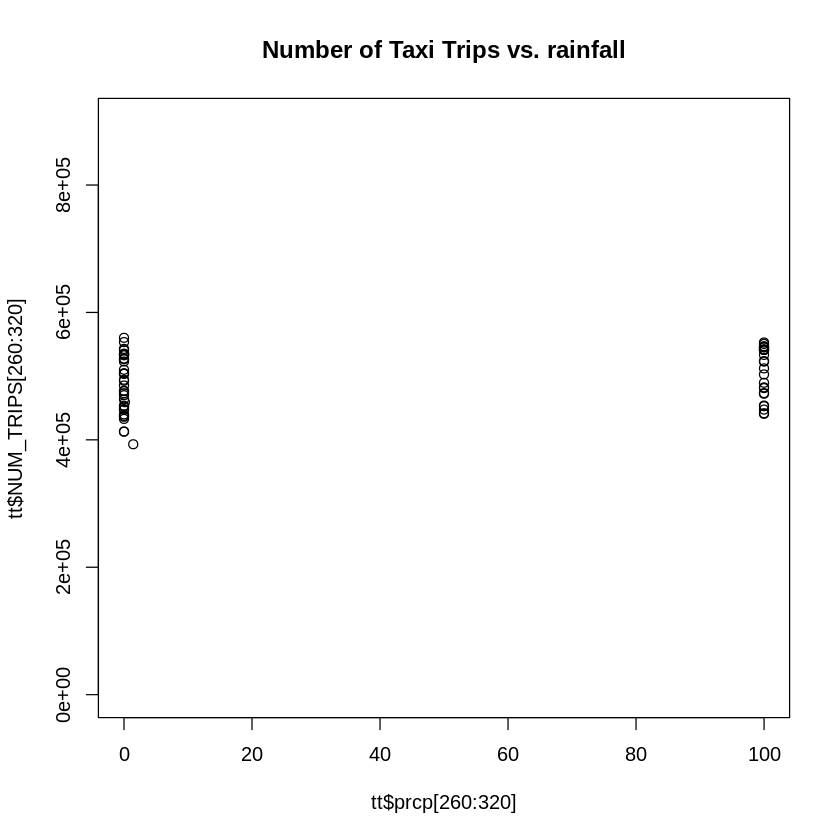

In [ ]:
plot(tt$prcp[260:320], tt$NUM_TRIPS[260:320], main="Number of Taxi Trips vs. rainfall",  ylim=c(0,900000))

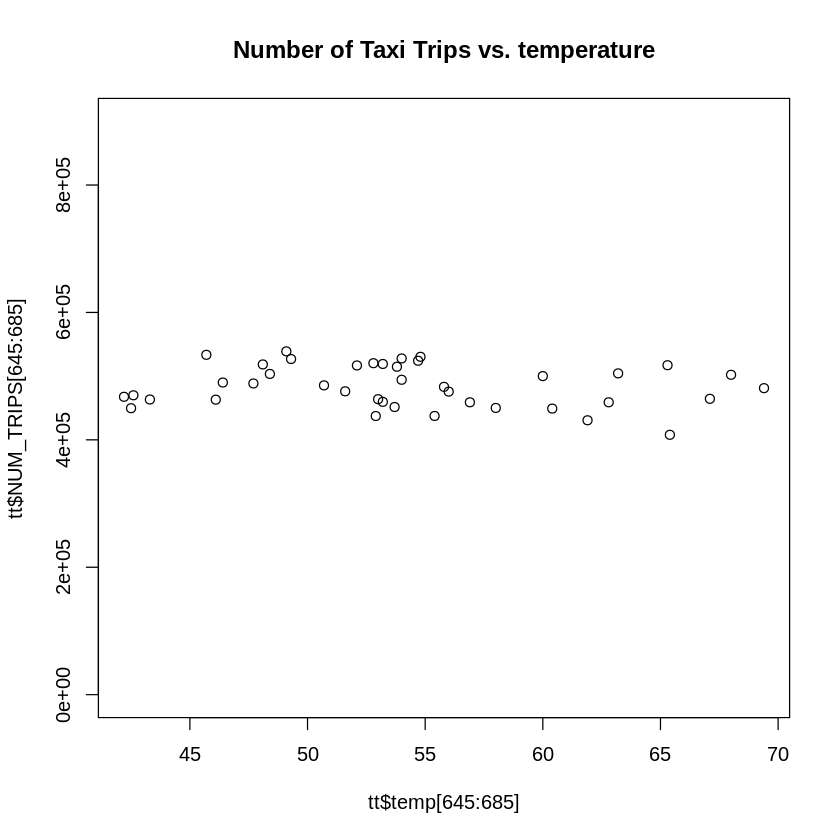

In [ ]:
plot(tt$temp[645:685], tt$NUM_TRIPS[645:685], main="Number of Taxi Trips vs. temperature",  ylim=c(0,900000))

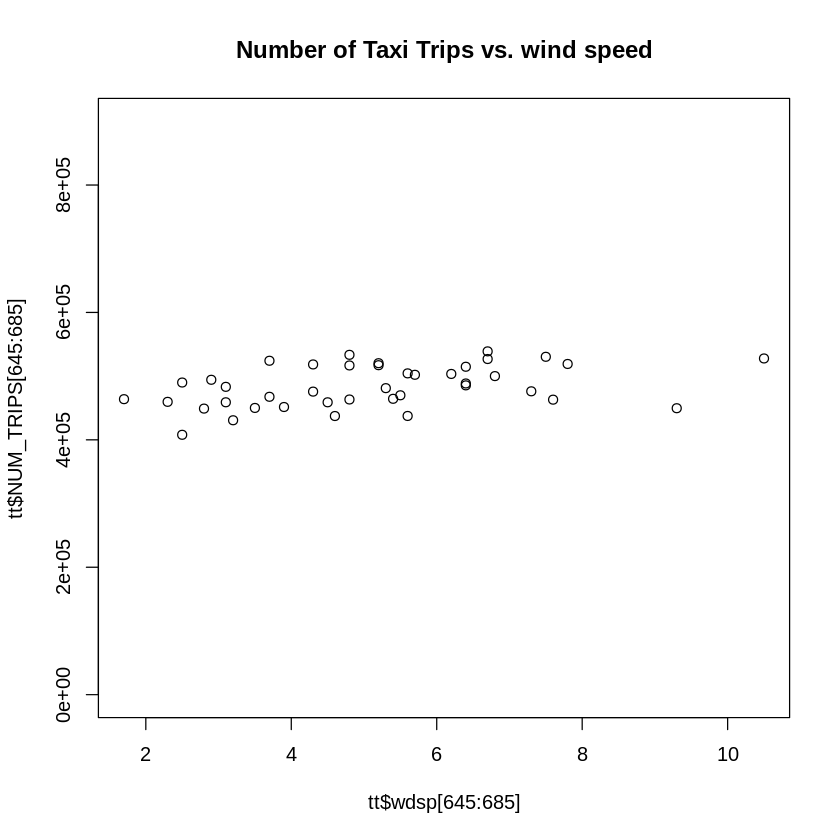

In [ ]:
plot(tt$wdsp[645:685], tt$NUM_TRIPS[645:685], main="Number of Taxi Trips vs. wind speed",  ylim=c(0,900000))

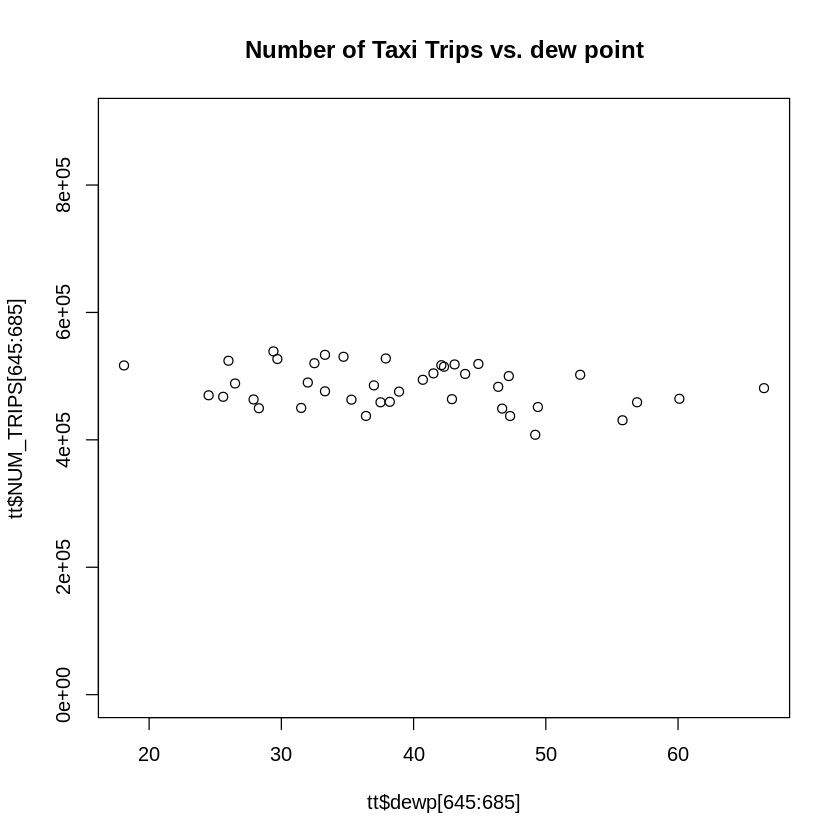

In [ ]:
plot(tt$dewp[645:685], tt$NUM_TRIPS[645:685], main="Number of Taxi Trips vs. dew point",  ylim=c(0,900000))

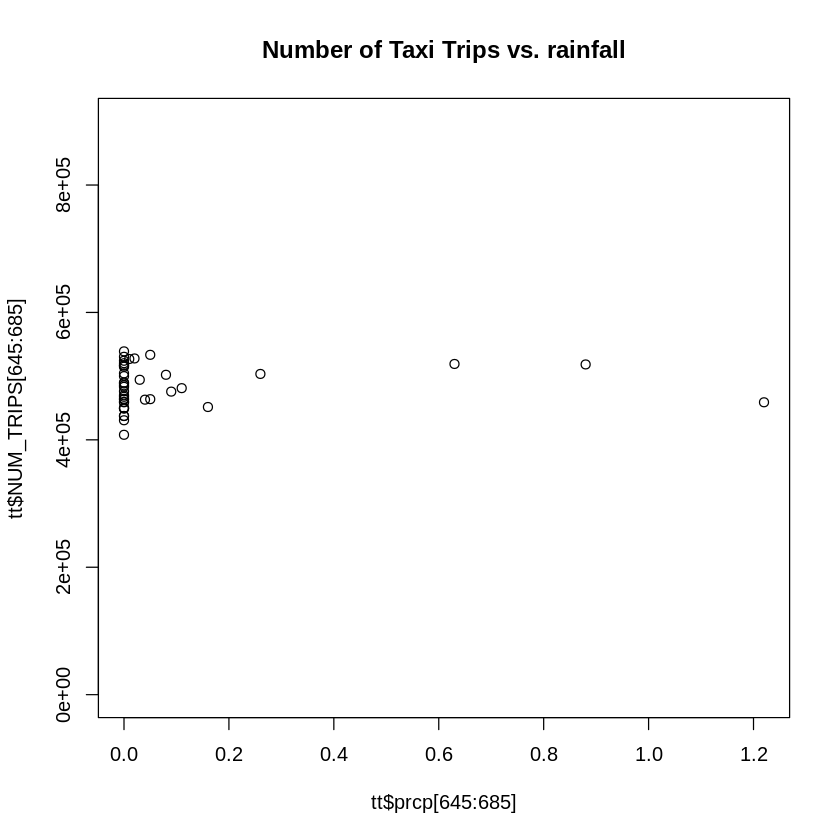

In [ ]:
plot(tt$prcp[645:685], tt$NUM_TRIPS[645:685], main="Number of Taxi Trips vs. rainfall",  ylim=c(0,900000))

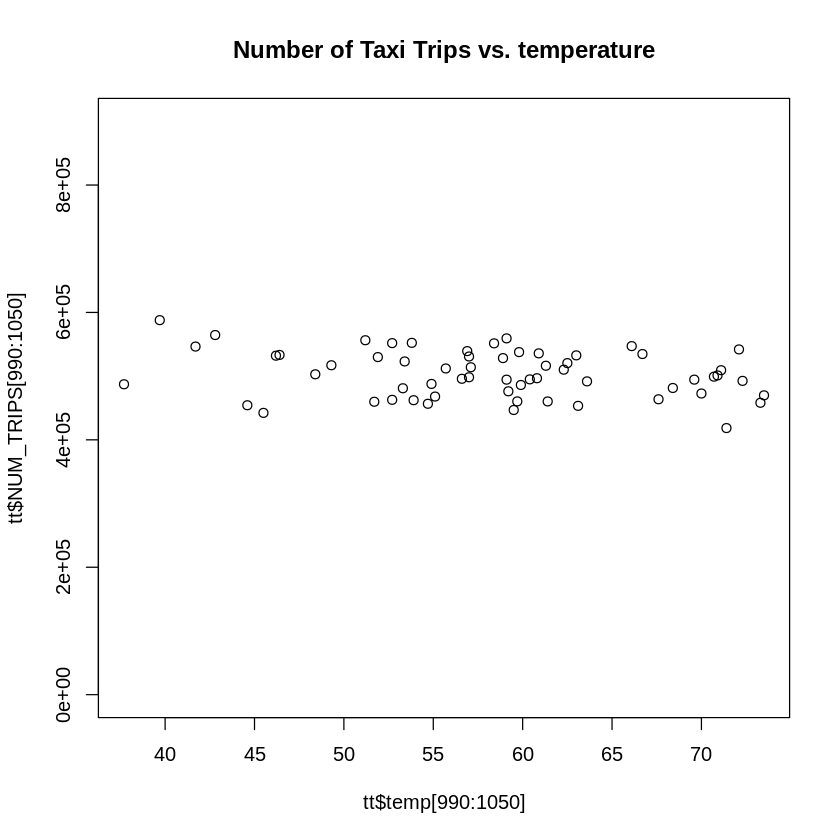

In [ ]:
plot(tt$temp[990:1050], tt$NUM_TRIPS[990:1050], main="Number of Taxi Trips vs. temperature",  ylim=c(0,900000))

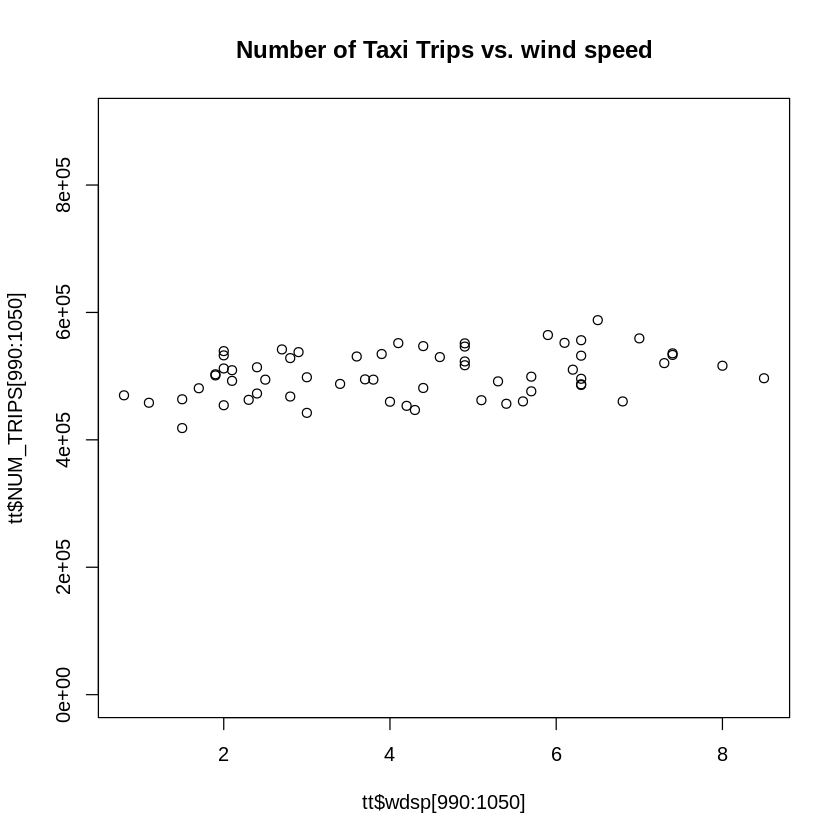

In [ ]:
plot(tt$wdsp[990:1050], tt$NUM_TRIPS[990:1050], main="Number of Taxi Trips vs. wind speed",  ylim=c(0,900000))

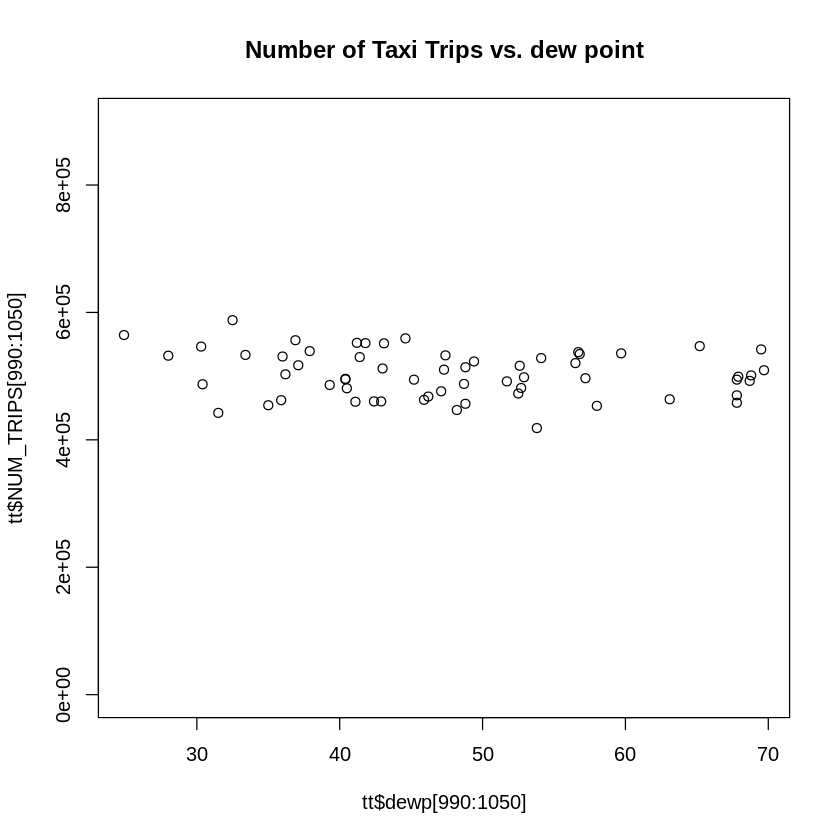

In [ ]:
plot(tt$dewp[990:1050], tt$NUM_TRIPS[990:1050], main="Number of Taxi Trips vs. dew point",  ylim=c(0,900000))

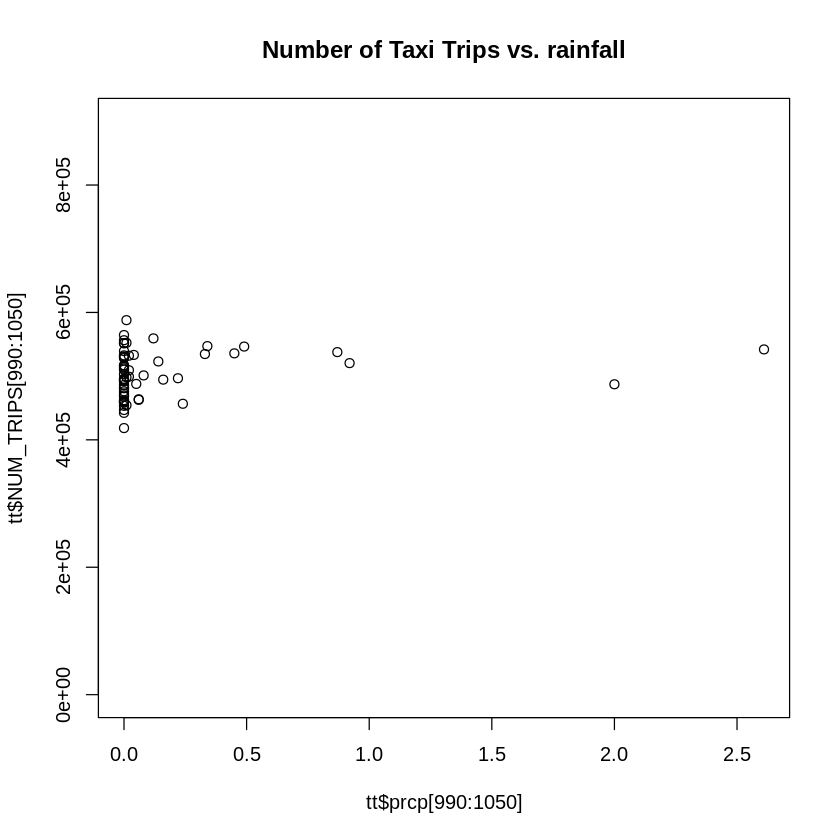

In [ ]:
plot(tt$prcp[990:1050], tt$NUM_TRIPS[990:1050], main="Number of Taxi Trips vs. rainfall",  ylim=c(0,900000))

At this point, I think it is safe to say that rain (prcp) does not have a linear relationship. So, I think I will ignore it. Temperature seems to have an extremely loose (wishful thinking Russell, it's for the purposes of this example, please humour me) negative linear relationship i.e. As the temperature increases, the number of trips decreases. Windspeed also has a loose positive linear relationship. I think I will use these with day of the week. I know, I know, Sunday has approximately the lowest amount of taxi trips. Perhaps we can do something about that as day of the week would have a good linear relationship with number of trips if Sunday was number 1. 

In [ ]:
ttest <- read.csv("https://raw.githubusercontent.com/rih28/1122131_DataAnalytics/master/results-20200722-185837.csv")

In [ ]:
head(ttest)

,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,4,2009,1,1,2009-01-01,12.2,2.8,1012.6,11.4,18.5,26.0,33.0,21.2,5.0,0.55,5.1,0,327625
2,5,2009,1,2,2009-01-02,20.0,12.0,1015.5,13.7,7.4,20.0,21.0,39.9,5.0,0.00,3.1,0,376708
3,6,2009,1,3,2009-01-03,30.0,20.2,1007.1,11.7,10.8,18.1,24.1,35.1,26.6,0.00,2.0,0,432710
4,7,2009,1,4,2009-01-04,26.1,13.7,1012.4,15.0,11.5,17.1,24.1,35.6,21.2,0.00,2.0,0,367525
5,1,2009,1,5,2009-01-05,31.2,24.7,1012.2,13.1,3.9,8.9,999.9,41.0,19.4,0.00,1.2,0,370901
6,2,2009,1,6,2009-01-06,30.4,17.8,1015.4,14.4,5.7,12.0,999.9,35.6,26.6,0.00,1.2,0,427394


Let's make Sunday == 1

In [ ]:
ttest$day <- ttest$day+1

In [ ]:
head(ttest)

,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,5,2009,1,1,2009-01-01,12.2,2.8,1012.6,11.4,18.5,26.0,33.0,21.2,5.0,0.55,5.1,0,327625
2,6,2009,1,2,2009-01-02,20.0,12.0,1015.5,13.7,7.4,20.0,21.0,39.9,5.0,0.00,3.1,0,376708
3,7,2009,1,3,2009-01-03,30.0,20.2,1007.1,11.7,10.8,18.1,24.1,35.1,26.6,0.00,2.0,0,432710
4,8,2009,1,4,2009-01-04,26.1,13.7,1012.4,15.0,11.5,17.1,24.1,35.6,21.2,0.00,2.0,0,367525
5,2,2009,1,5,2009-01-05,31.2,24.7,1012.2,13.1,3.9,8.9,999.9,41.0,19.4,0.00,1.2,0,370901
6,3,2009,1,6,2009-01-06,30.4,17.8,1015.4,14.4,5.7,12.0,999.9,35.6,26.6,0.00,1.2,0,427394


In [ ]:
ttest$day[ttest$day == 8] <- 1

In [ ]:
head(ttest)

,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,5,2009,1,1,2009-01-01,12.2,2.8,1012.6,11.4,18.5,26.0,33.0,21.2,5.0,0.55,5.1,0,327625
2,6,2009,1,2,2009-01-02,20.0,12.0,1015.5,13.7,7.4,20.0,21.0,39.9,5.0,0.00,3.1,0,376708
3,7,2009,1,3,2009-01-03,30.0,20.2,1007.1,11.7,10.8,18.1,24.1,35.1,26.6,0.00,2.0,0,432710
4,1,2009,1,4,2009-01-04,26.1,13.7,1012.4,15.0,11.5,17.1,24.1,35.6,21.2,0.00,2.0,0,367525
5,2,2009,1,5,2009-01-05,31.2,24.7,1012.2,13.1,3.9,8.9,999.9,41.0,19.4,0.00,1.2,0,370901
6,3,2009,1,6,2009-01-06,30.4,17.8,1015.4,14.4,5.7,12.0,999.9,35.6,26.6,0.00,1.2,0,427394


Okay, so let's have a look at days of the week against number of taxi trips with Sunday at the beginning.

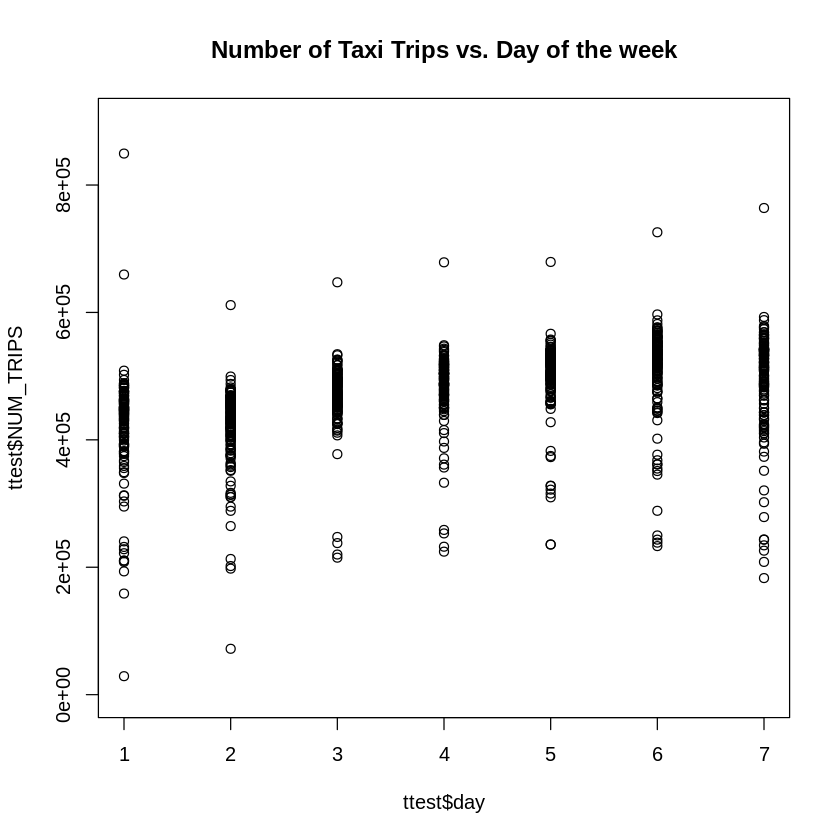

In [ ]:
plot(ttest$day, ttest$NUM_TRIPS, main="Number of Taxi Trips vs. Day of the week",  ylim=c(0,900000))

In [ ]:
cor(ttest$day, ttest$NUM_TRIPS)

[1] 0.4031928

With Sunday no day number 1, it looks like a pretty decent linear relationship. Except for the variability. 2010 is a good place to start by getting rid of the odd values (the very high and very low). In someways, it would be best to remove all outliers as they are likely to be on holidays of some sort.

An outlier is an observation that appears to deviate markedly from other observations in the sample An outlier may indicate bad data. For example, the data may have been coded incorrectly or an experiment may not have been run correctly. 

This is sometimes dangerous to make guesses, but it is clear there are outliers in 2010. 

In [ ]:
ttsplitcheck <- ttest

Let's split up the data by year again and add a dayindex (1 to 365) and dayofyear(1 to 365 for 2009, 366 to 730 for 2010 etc).

In [ ]:
ttsc09 <- ttsplitcheck[which(ttsplitcheck$year == 2009), ]

In [ ]:
dayofyear <- 1*seq_len(nrow(ttsc09))
dayindex <- 1*seq_len(nrow(ttsc09))
ttsc09a <- cbind(dayindex, dayofyear, ttsc09)

In [ ]:
ttsc10 <- ttsplitcheck[which(ttsplitcheck$year == 2010), ]

In [ ]:
dayofyear <- 1*seq_len(nrow(ttsc10))
dayindex <- 1*seq_len(nrow(ttsc10)) + 365
ttsc10a <- cbind(dayindex, dayofyear, ttsc10)

In [ ]:
ttsc11 <- ttsplitcheck[which(ttsplitcheck$year == 2011), ]

In [ ]:
dayofyear <- 1*seq_len(nrow(ttsc11))
dayindex <- 1*seq_len(nrow(ttsc11)) + 730
ttsc11a <- cbind(dayindex, dayofyear, ttsc11)

Now, let's have a look at the number of trips on each day of the year for all 3 years on top of each other. I am doing this to see if the spead of the data and yearly pattern is similar.

In [ ]:
library(ggplot2)

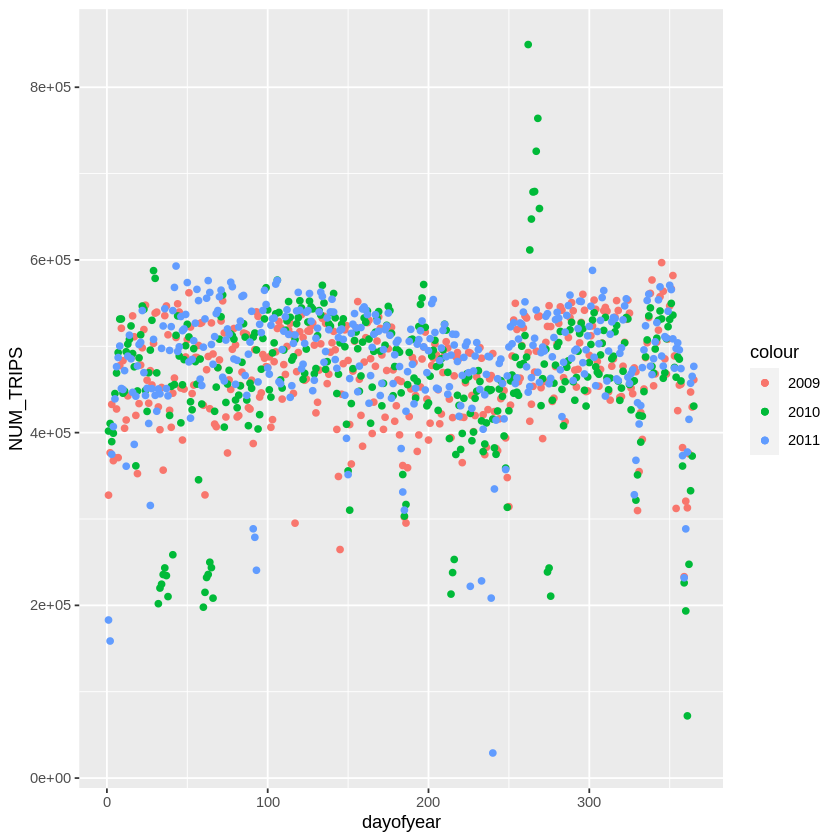

In [ ]:
ggplot() +
  geom_point(data=ttsc09a, aes(dayofyear, NUM_TRIPS, color="2009")) +
  geom_point(data=ttsc10a, aes(dayofyear, NUM_TRIPS, color="2010")) +
  geom_point(data=ttsc11a, aes(dayofyear, NUM_TRIPS, color="2011"))

Apart from the outliers in 2010, it seems clear that there is a yearly pattern and there is a general yearly increase (this might be a stretch too far, but certainly for 2011). It's something for you to look out for.

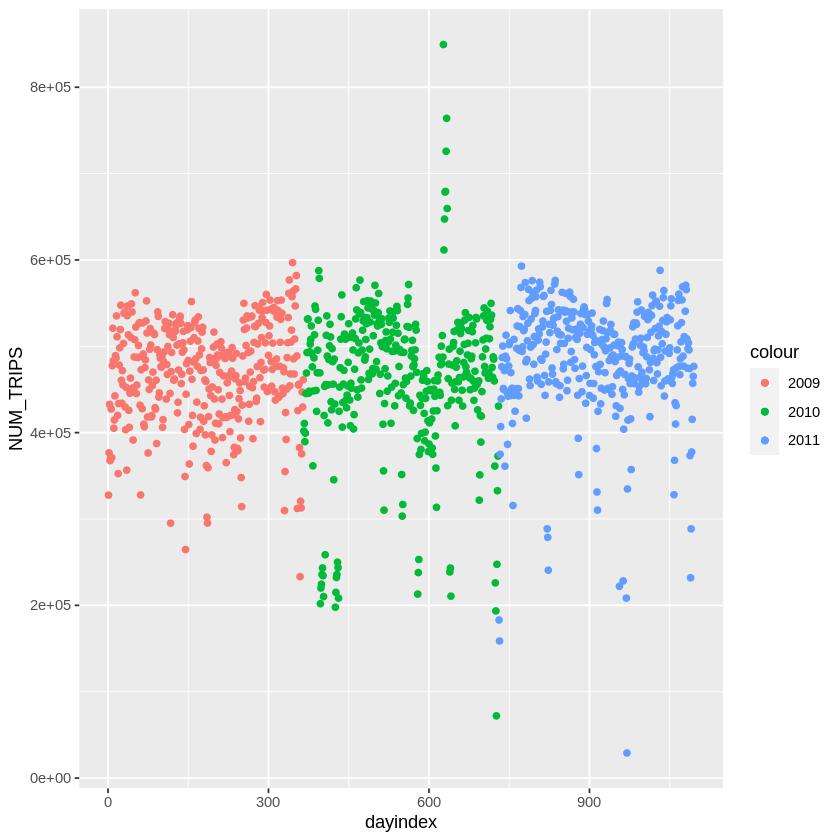

In [ ]:
ggplot() +
  geom_point(data=ttsc09a, aes(dayindex, NUM_TRIPS, color="2009")) +
  geom_point(data=ttsc10a, aes(dayindex, NUM_TRIPS, color="2010")) +
  geom_point(data=ttsc11a, aes(dayindex, NUM_TRIPS, color="2011"))

Here is the data over the three years and you can see the seasonal pattern and the slight increase in general each year. 

Let's remove outliers below 250000 and above 600000.

In [ ]:
ttsc09b <- ttsc09a[which(ttsc09a$NUM_TRIPS >= 250000), ]
ttsc10b <- ttsc10a[which(ttsc10a$NUM_TRIPS >= 250000), ]
ttsc11b <- ttsc11a[which(ttsc11a$NUM_TRIPS >= 250000), ]
ttsc09c <- ttsc09b[which(ttsc09b$NUM_TRIPS <= 600000), ]
ttsc10c <- ttsc10b[which(ttsc10b$NUM_TRIPS <= 600000), ]
ttsc11c <- ttsc11b[which(ttsc11b$NUM_TRIPS <= 600000), ]

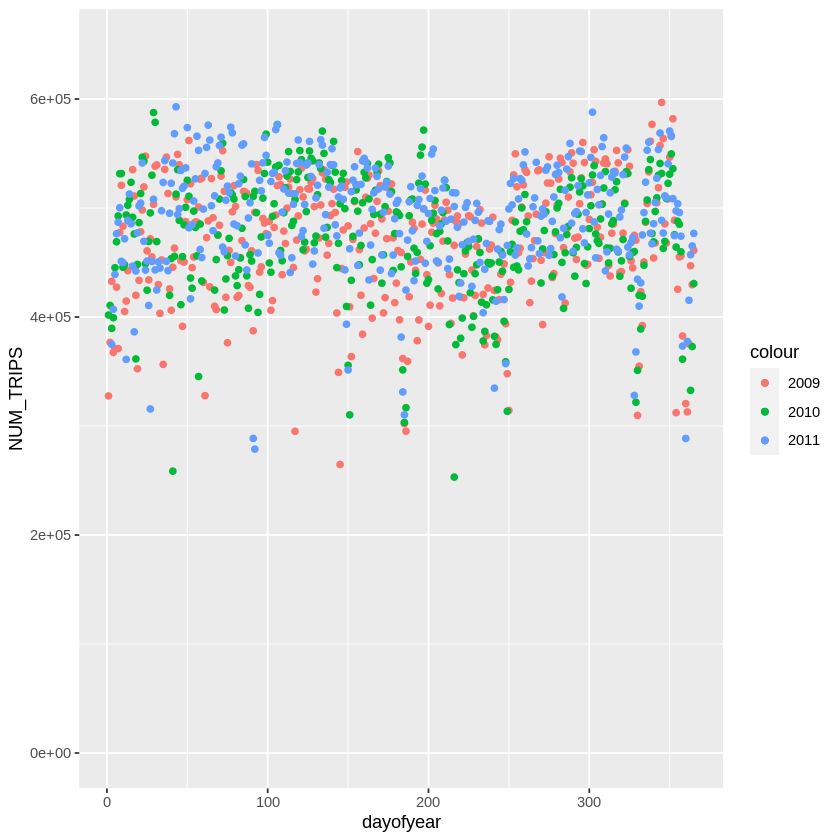

In [ ]:
sp <- ggplot() +
  geom_point(data=ttsc09c, aes(dayofyear, NUM_TRIPS, color="2009")) +
  geom_point(data=ttsc10c, aes(dayofyear, NUM_TRIPS, color="2010")) +
  geom_point(data=ttsc11c, aes(dayofyear, NUM_TRIPS, color="2011"))

sp+ylim(0, 650000)

There are still some outliers, although, I worry about removing too much. This is something you should think about. I think I will make a cut off at 375000, 385000 and 400000.

In [ ]:
ttsc09d <- ttsc09c[which(ttsc09c$NUM_TRIPS >= 375000), ]
ttsc10d <- ttsc10c[which(ttsc10c$NUM_TRIPS >= 385000), ]
ttsc11d <- ttsc11c[which(ttsc11c$NUM_TRIPS >= 400000), ]

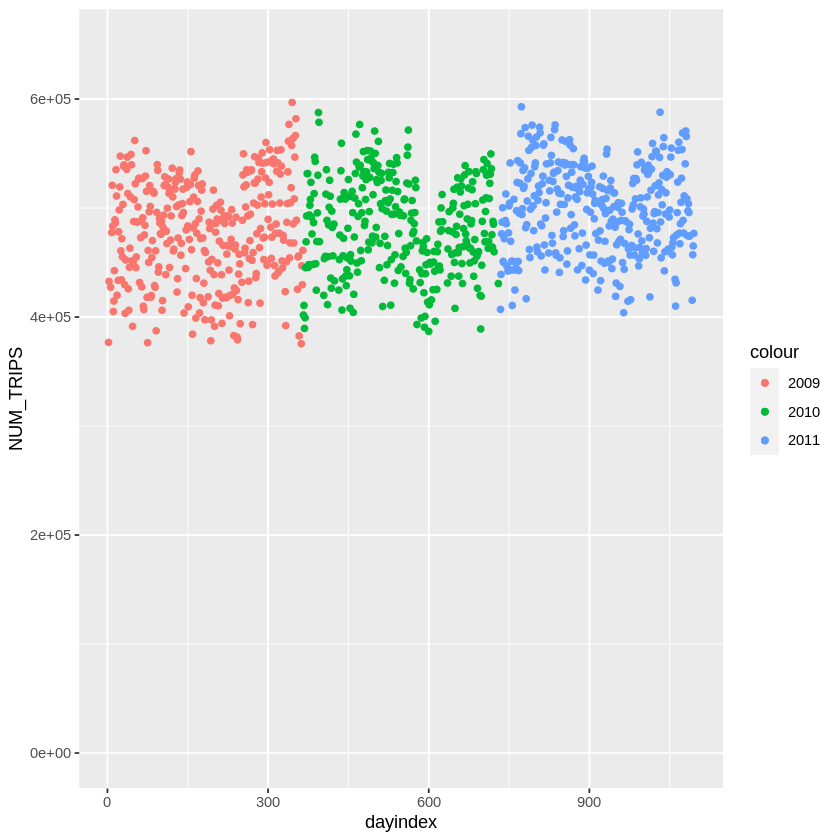

In [ ]:
sp <- ggplot() +
  geom_point(data=ttsc09d, aes(dayindex, NUM_TRIPS, color="2009")) +
  geom_point(data=ttsc10d, aes(dayindex, NUM_TRIPS, color="2010")) +
  geom_point(data=ttsc11d, aes(dayindex, NUM_TRIPS, color="2011"))

sp+ylim(0, 650000)

Because of this yearly increase and similar yearly pattern, i'm going to make a crude scaling by taking the maximum and using it to proportionalise all of the number of trips between 0 and 1. However, this is not the best way:

You should look to apply normalization or standardization formula instead.

Standardization rescales data so that it has a mean of 0 and a standard deviation of 1.

standardisation: (𝑥 − 𝜇)/𝜎

We subtract the mean (𝜇) from each value (x) and then divide by the standard deviation (𝜎).

Normalization rescales the data into the range [0, 1].

normalization: (𝑥 −𝑥𝑚𝑖𝑛)/(𝑥𝑚𝑎𝑥 −𝑥𝑚𝑖𝑛)

For each individual value, you subtract the minimum value (𝑥𝑚𝑖𝑛) for that input in the training dataset, and then divide by the range of the values in the training dataset. The range of the values is the difference between the maximum value (𝑥𝑚𝑎𝑥) and the minimum value (𝑥𝑚𝑖𝑛).



In [ ]:
summary(ttsc09d$NUM_TRIPS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 375455  444922  481478  478191  516992  596882 

In [ ]:
summary(ttsc10d$NUM_TRIPS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 386820  450430  483217  483017  516791  587602 

In [ ]:
summary(ttsc11d$NUM_TRIPS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 403936  467612  500648  499098  529248  592896 

In [ ]:
ttsc09d$NUM_TRIPS <- ttsc09d$NUM_TRIPS/596882

In [ ]:
ttsc10d$NUM_TRIPS <- ttsc10d$NUM_TRIPS/587602

In [ ]:
ttsc11d$NUM_TRIPS <- ttsc11d$NUM_TRIPS/592896

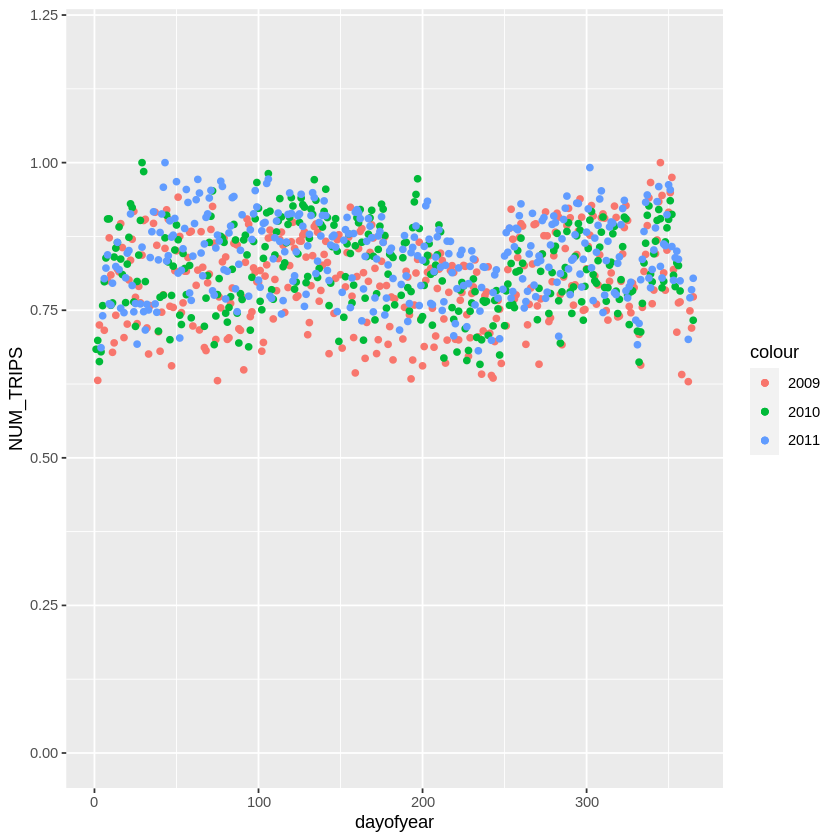

In [ ]:
sp <- ggplot() +
  geom_point(data=ttsc09d, aes(dayofyear, NUM_TRIPS, color="2009")) +
  geom_point(data=ttsc10d, aes(dayofyear, NUM_TRIPS, color="2010")) +
  geom_point(data=ttsc11d, aes(dayofyear, NUM_TRIPS, color="2011"))

sp+ylim(0, 1.2)

There still appears to be more 2009 values for lower number of trips. My scaling approach is possibly not the best, but it doesn't look too bad. Let's look more into it.

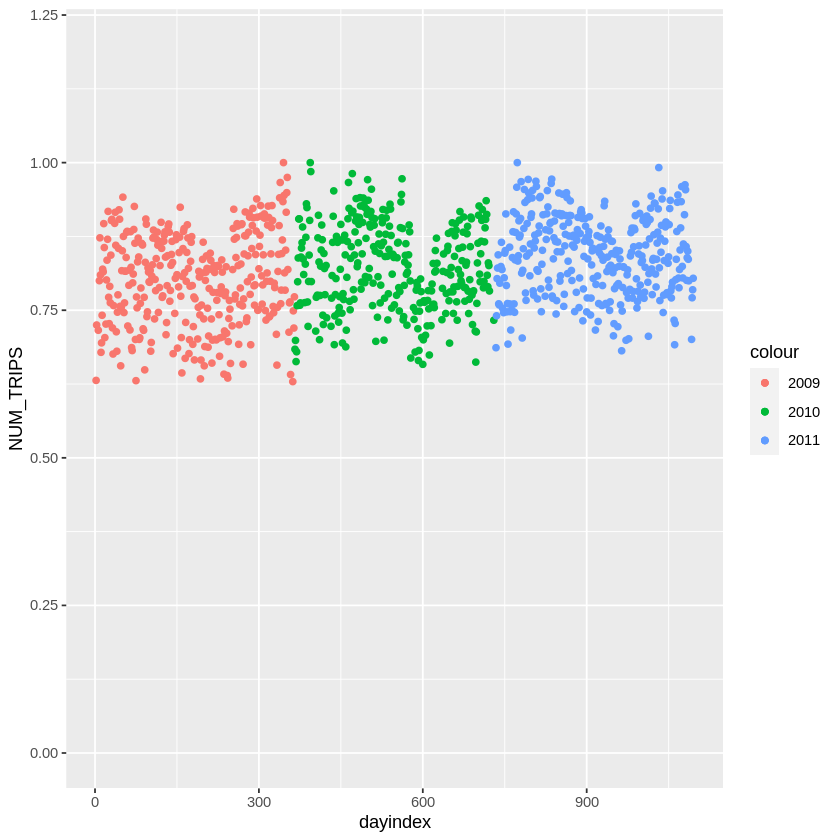

In [ ]:
sp <- ggplot() +
  geom_point(data=ttsc09d, aes(dayindex, NUM_TRIPS, color="2009")) +
  geom_point(data=ttsc10d, aes(dayindex, NUM_TRIPS, color="2010")) +
  geom_point(data=ttsc11d, aes(dayindex, NUM_TRIPS, color="2011"))

sp+ylim(0, 1.2)

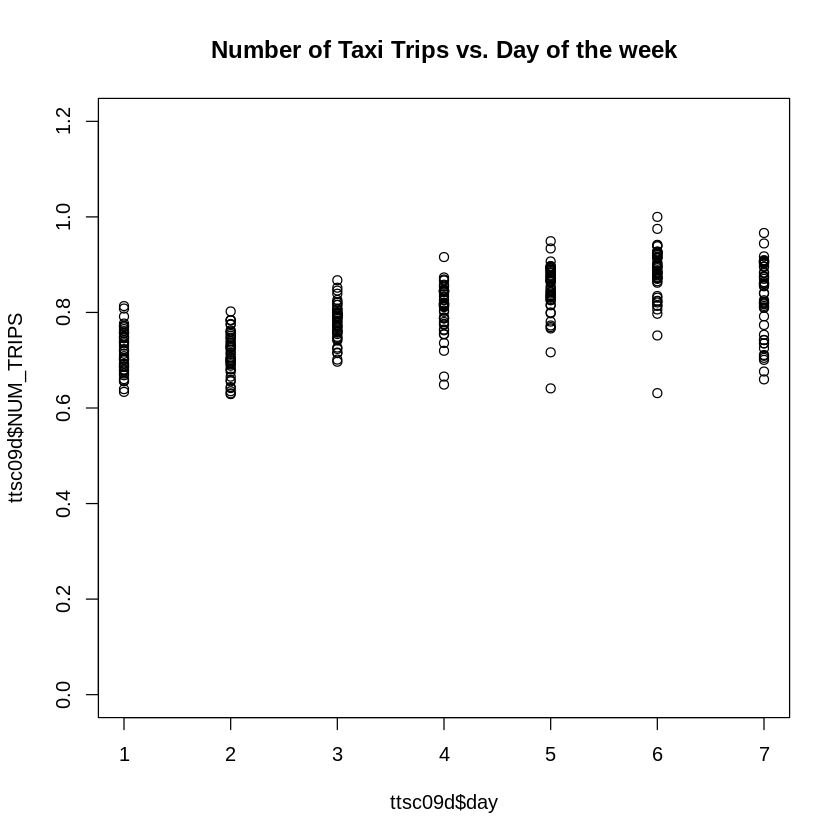

In [ ]:
plot(ttsc09d$day, ttsc09d$NUM_TRIPS, main="Number of Taxi Trips vs. Day of the week",  ylim=c(0,1.2))

In [ ]:
cor(ttsc09d$day, ttsc09d$NUM_TRIPS)

[1] 0.6505326

For 2009, there appear to be a strong positive correlation with Sunday at the start.

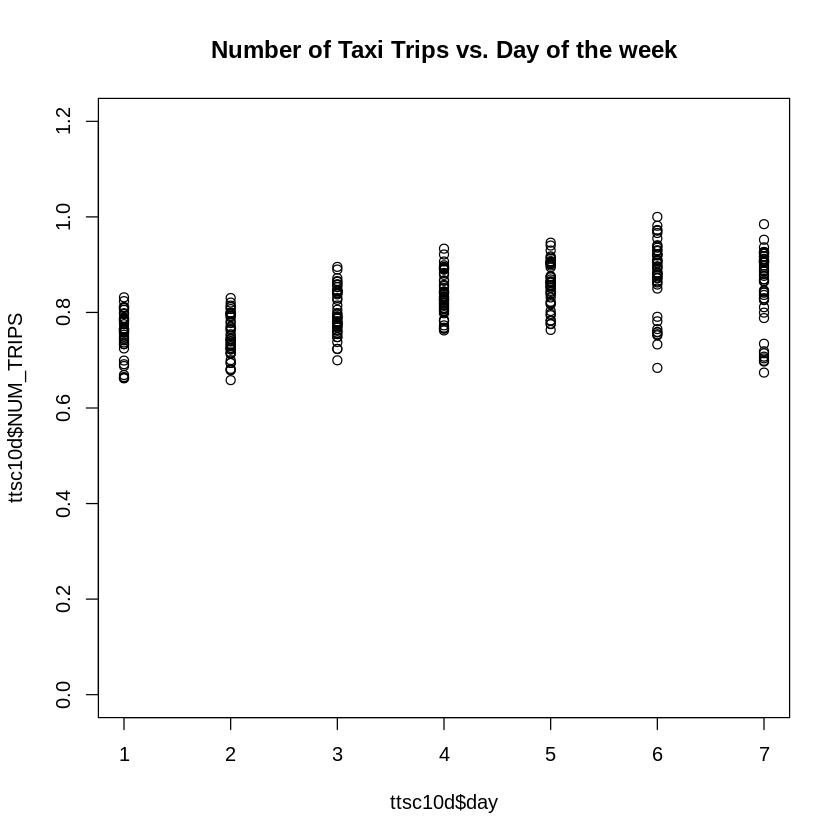

In [ ]:
plot(ttsc10d$day, ttsc10d$NUM_TRIPS, main="Number of Taxi Trips vs. Day of the week",  ylim=c(0,1.2))

In [ ]:
cor(ttsc10d$day, ttsc10d$NUM_TRIPS)

[1] 0.5838177

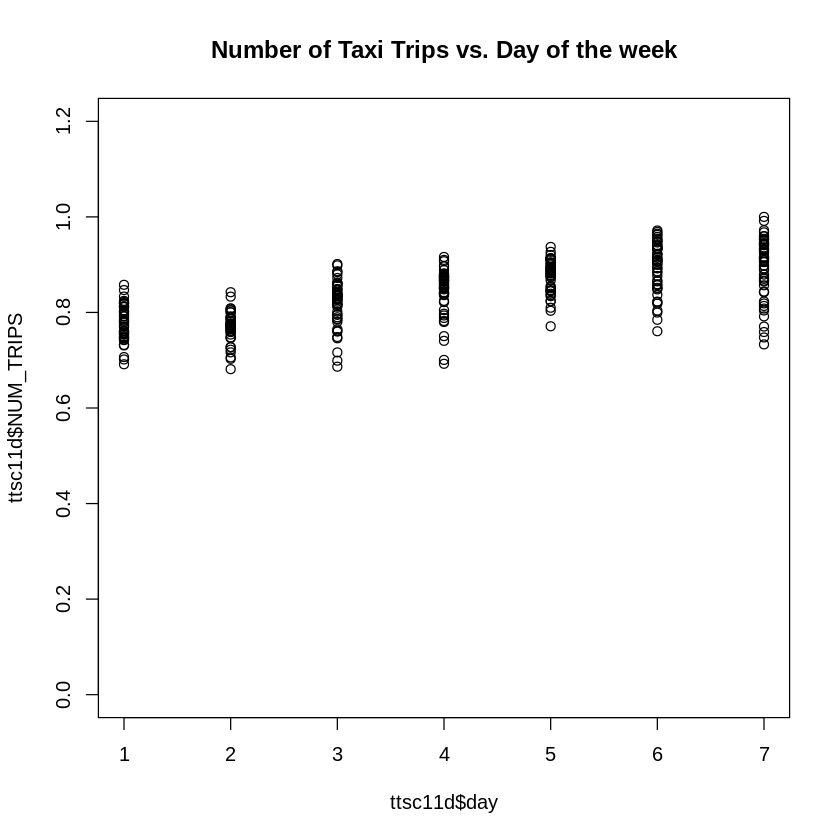

In [ ]:
plot(ttsc11d$day, ttsc11d$NUM_TRIPS, main="Number of Taxi Trips vs. Day of the week",  ylim=c(0,1.2))

In [ ]:
cor(ttsc11d$day, ttsc11d$NUM_TRIPS)

[1] 0.6861406

Similarly with 2011 and 2010 is lower, significantly, but still strong. Let's see what it is with all the data together.

In [ ]:
ttsplitcheckcombined <- rbind(ttsc09d, ttsc10d, ttsc11d)

In [ ]:
ttsplitcheckcombined

,dayindex,dayofyear,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2,2,2,6,2009,1,2,2009-01-02,20.0,12.0,1015.5,13.7,7.4,20.0,21.0,39.9,5.0,0.00,3.1,0,0.6311264
3,3,3,7,2009,1,3,2009-01-03,30.0,20.2,1007.1,11.7,10.8,18.1,24.1,35.1,26.6,0.00,2.0,0,0.7249507
6,6,6,3,2009,1,6,2009-01-06,30.4,17.8,1015.4,14.4,5.7,12.0,999.9,35.6,26.6,0.00,1.2,0,0.7160444
8,8,8,5,2009,1,8,2009-01-08,37.9,30.7,989.8,9.7,16.4,27.0,35.0,48.2,32.0,0.65,999.9,1,0.7999940
9,9,9,6,2009,1,9,2009-01-09,25.7,12.4,1006.3,15.0,13.8,20.0,26.0,33.1,21.2,0.00,999.9,0,0.8726113
10,10,10,7,2009,1,10,2009-01-10,21.6,9.6,1021.9,14.5,6.9,20.0,999.9,28.9,15.8,99.99,999.9,0,0.8097916
11,11,11,1,2009,1,11,2009-01-11,28.8,27.3,1009.7,3.7,9.0,21.0,25.1,39.0,21.2,0.49,2.0,0,0.6786517
12,12,12,2,2009,1,12,2009-01-12,26.9,21.9,1017.0,9.6,5.8,12.0,999.9,32.0,19.4,0.07,1.2,0,0.6946800
13,13,13,3,2009,1,13,2009-01-13,23.4,18.4,1022.0,14.0,3.3,8.9,999.9,35.6,10.4,0.02,1.2,0,0.7414246


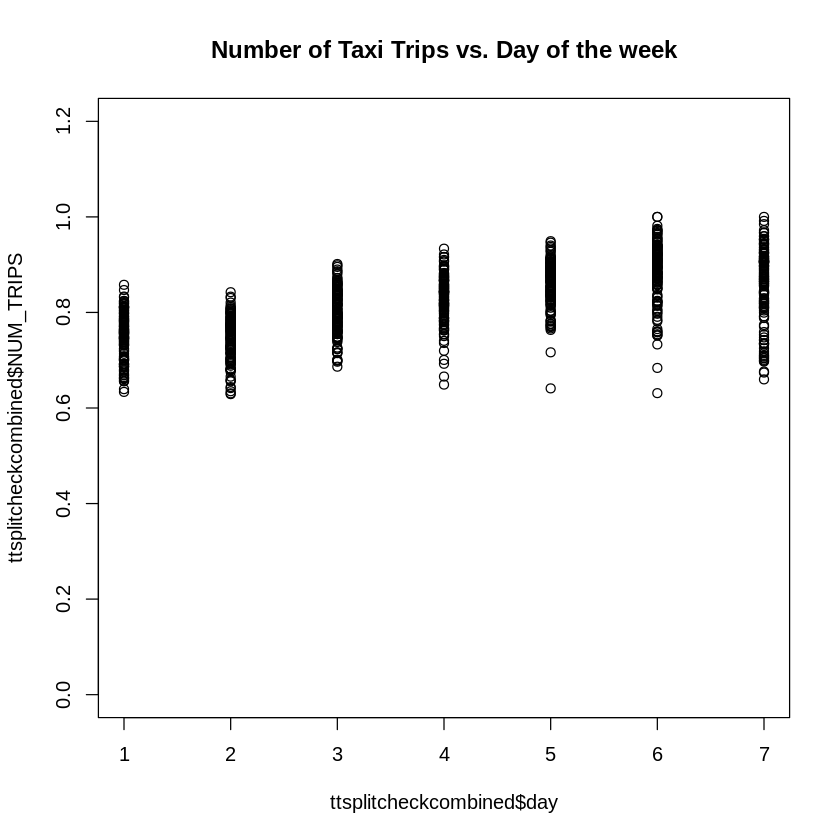

In [ ]:
plot(ttsplitcheckcombined$day, ttsplitcheckcombined$NUM_TRIPS, main="Number of Taxi Trips vs. Day of the week",  ylim=c(0,1.2))

In [ ]:
cor(ttsplitcheckcombined$day, ttsplitcheckcombined$NUM_TRIPS)

[1] 0.6221396

Yes, a very good positive linear relationship.

In [ ]:
cor(ttsplitcheckcombined$temp, ttsplitcheckcombined$NUM_TRIPS)

[1] -0.07302076

In [ ]:
cor(ttsplitcheckcombined$wdsp, ttsplitcheckcombined$NUM_TRIPS)

[1] 0.02072846

Windspeed and temp are going to be used, but really, the correlation is poor. Again, this is just something for you to think about. 

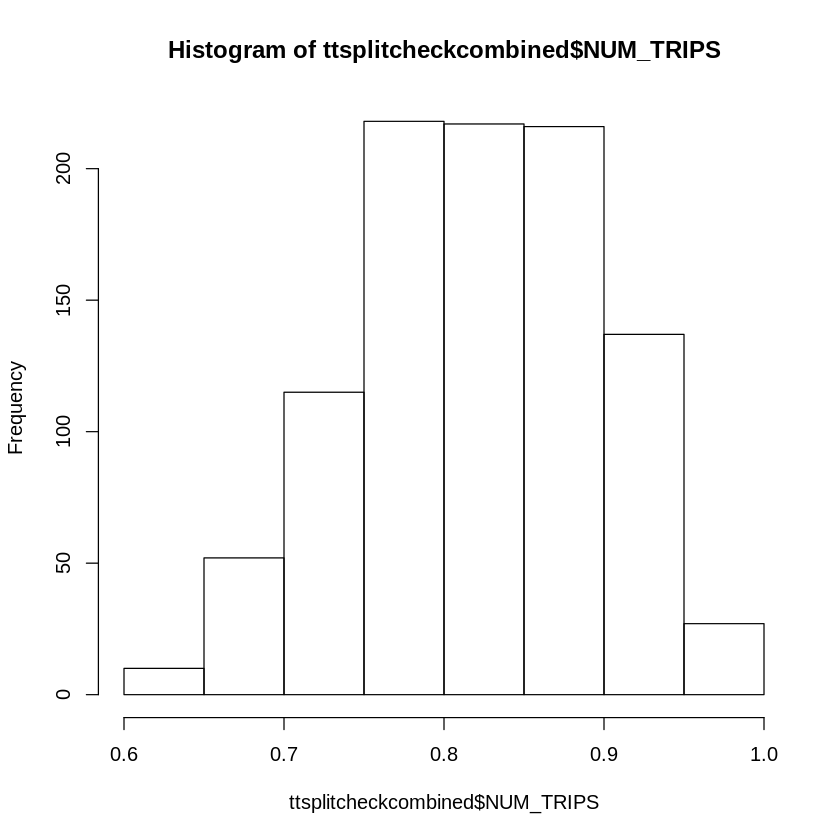

In [ ]:
hist(ttsplitcheckcombined$NUM_TRIPS, breaks =8)

We now have a good, normal distribution for NUM_TRIPS. So, let's export this data as we have done before and upload it to your github repo that you created. We will need it for tutorial 3. I am only going to take out day of the week, temperature and wind speed. If I were doing this in the assignment, I might take only temperature, and some other variations. Obviously we need NUM_TRIPS. This is just for the linear regressor.

In [ ]:
head(ttsplitcheckcombined)

,dayindex,dayofyear,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2,2,2,6,2009,1,2,2009-01-02,20.0,12.0,1015.5,13.7,7.4,20.0,21.0,39.9,5.0,0.00,3.1,0,0.6311264
3,3,3,7,2009,1,3,2009-01-03,30.0,20.2,1007.1,11.7,10.8,18.1,24.1,35.1,26.6,0.00,2.0,0,0.7249507
6,6,6,3,2009,1,6,2009-01-06,30.4,17.8,1015.4,14.4,5.7,12.0,999.9,35.6,26.6,0.00,1.2,0,0.7160444
8,8,8,5,2009,1,8,2009-01-08,37.9,30.7,989.8,9.7,16.4,27.0,35.0,48.2,32.0,0.65,999.9,1,0.7999940
9,9,9,6,2009,1,9,2009-01-09,25.7,12.4,1006.3,15.0,13.8,20.0,26.0,33.1,21.2,0.00,999.9,0,0.8726113
10,10,10,7,2009,1,10,2009-01-10,21.6,9.6,1021.9,14.5,6.9,20.0,999.9,28.9,15.8,99.99,999.9,0,0.8097916


In [ ]:
linearregressiondata <- ttsplitcheckcombined[,c(3,8,12,20)]

In [ ]:
head(linearregressiondata)

,day,temp,wdsp,NUM_TRIPS
,<dbl>,<dbl>,<dbl>,<dbl>
2,6,20.0,7.4,0.6311264
3,7,30.0,10.8,0.7249507
6,3,30.4,5.7,0.7160444
8,5,37.9,16.4,0.7999940
9,6,25.7,13.8,0.8726113
10,7,21.6,6.9,0.8097916


In [ ]:
write.csv(linearregressiondata, file="/content/tutorial2lineardata.csv")

Something to think about from all of this. When it comes to the Deep Learning Neural Network approach, we most likely want to use Month and Year. I think using month as categorical data i.e. Jan, Feb etc. we can use one hot encoding. I think a similar approach may be worthwhile for day of the week too for the DNN method. 

There are two common approaches for encoding categorical data: ordinal encoding and one hot encoding. For months, ordinal might do the job.

One of the potential drawbacks ordinal encoding is that it implicitly assumes an order across the categories. For example, February (which is encoded with a value of 2) seems to be more than January (which is encoded with a value of 1), even though this is in fact not a meaningful way of comparing those values. This is not necessarily a problem, but it is a reason to be cautious in terms of how the encoded data is used.

The reason for this, is because of the seasonality issue. We can assume that year on year there is a marginal increase, but that there is a pattern every year. By using month (which may not be perfect) will hopefully allow the kind of reduction of variability we say earlier on in this example, where I took a subset from 2009, 2010 and 2011. 

For you assignment, you likely want to make a number of different data to use with the linear or the DNN models. For example, [dayofweek, NUM_TRIPS], [dayofweek, temp, NUM_TRIPS], [dayofweek, temp, wdsp, NUM_TRIPS] (and so on). Or for the DNN [month, year, dayofweek, temp, wdsp, prcp, dewp, NUM_TRIPS], [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec, year, dayofweek, temp, wdsp, prcp, dewp, fog, NUM_TRIPS] or [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec, year, sun, mon, tue, wed, thu, fri, sat, temp, wdsp, prcp, dewp, fog, NUM_TRIPS].

You can then do some testing between each model that is trained with different data. This is not an exhaustive list. Just to help you with what lengths you should go to. Remember, that in this instance, I will be able to construct data to validate my results. You should probably take a couple of examples from your assignment data as it is slightly different i.e. pick 3 or 5 or something, remove them from the data used to train and test and keep it to check how well your model runs.

Let's try some one-hot encoding with our categorical month data.

First thing that we will need to do is change months to text i.e. 1 to Jan ... 12 to Dec. 

In [ ]:
ttsplitcheckcombined2 <- ttsplitcheckcombined

In [ ]:
ttsplitcheckcombined2$mo[ttsplitcheckcombined2$mo == 1] <- 'Jan'
ttsplitcheckcombined2$mo[ttsplitcheckcombined2$mo == 2] <- 'Feb'
ttsplitcheckcombined2$mo[ttsplitcheckcombined2$mo == 3] <- 'Mar'
ttsplitcheckcombined2$mo[ttsplitcheckcombined2$mo == 4] <- 'Apr'
ttsplitcheckcombined2$mo[ttsplitcheckcombined2$mo == 5] <- 'May'
ttsplitcheckcombined2$mo[ttsplitcheckcombined2$mo == 6] <- 'Jun'
ttsplitcheckcombined2$mo[ttsplitcheckcombined2$mo == 7] <- 'Jul'
ttsplitcheckcombined2$mo[ttsplitcheckcombined2$mo == 8] <- 'Aug'
ttsplitcheckcombined2$mo[ttsplitcheckcombined2$mo == 9] <- 'Sep'
ttsplitcheckcombined2$mo[ttsplitcheckcombined2$mo == 10] <- 'Oct'
ttsplitcheckcombined2$mo[ttsplitcheckcombined2$mo == 11] <- 'Nov'
ttsplitcheckcombined2$mo[ttsplitcheckcombined2$mo == 12] <- 'Dec'

Next, let's do the same for day of the week. If you remember, Sunday is day 1.

In [ ]:
ttsplitcheckcombined2$day[ttsplitcheckcombined2$day == 1] <- 'Sun'
ttsplitcheckcombined2$day[ttsplitcheckcombined2$day == 2] <- 'Mon'
ttsplitcheckcombined2$day[ttsplitcheckcombined2$day == 3] <- 'Tue'
ttsplitcheckcombined2$day[ttsplitcheckcombined2$day == 4] <- 'Wed'
ttsplitcheckcombined2$day[ttsplitcheckcombined2$day == 5] <- 'Thu'
ttsplitcheckcombined2$day[ttsplitcheckcombined2$day == 6] <- 'Fri'
ttsplitcheckcombined2$day[ttsplitcheckcombined2$day == 7] <- 'Sat'

In [ ]:
head(ttsplitcheckcombined2)

,dayindex,dayofyear,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2,2,2,Fri,2009,Jan,2,2009-01-02,20.0,12.0,1015.5,13.7,7.4,20.0,21.0,39.9,5.0,0.00,3.1,0,0.6311264
3,3,3,Sat,2009,Jan,3,2009-01-03,30.0,20.2,1007.1,11.7,10.8,18.1,24.1,35.1,26.6,0.00,2.0,0,0.7249507
6,6,6,Tue,2009,Jan,6,2009-01-06,30.4,17.8,1015.4,14.4,5.7,12.0,999.9,35.6,26.6,0.00,1.2,0,0.7160444
8,8,8,Thu,2009,Jan,8,2009-01-08,37.9,30.7,989.8,9.7,16.4,27.0,35.0,48.2,32.0,0.65,999.9,1,0.7999940
9,9,9,Fri,2009,Jan,9,2009-01-09,25.7,12.4,1006.3,15.0,13.8,20.0,26.0,33.1,21.2,0.00,999.9,0,0.8726113
10,10,10,Sat,2009,Jan,10,2009-01-10,21.6,9.6,1021.9,14.5,6.9,20.0,999.9,28.9,15.8,99.99,999.9,0,0.8097916


Now, we need to apply one-hot encoding on both Month and day of the week.

In [ ]:
months <- model.matrix(~0+ttsplitcheckcombined2$mo)
head(months)

,ttsplitcheckcombined2$moApr,ttsplitcheckcombined2$moAug,ttsplitcheckcombined2$moDec,ttsplitcheckcombined2$moFeb,ttsplitcheckcombined2$moJan,ttsplitcheckcombined2$moJul,ttsplitcheckcombined2$moJun,ttsplitcheckcombined2$moMar,ttsplitcheckcombined2$moMay,ttsplitcheckcombined2$moNov,ttsplitcheckcombined2$moOct,ttsplitcheckcombined2$moSep
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")

In [ ]:
head(months)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
daysofweek <- model.matrix(~0+ttsplitcheckcombined2$day)
head(daysofweek)

,ttsplitcheckcombined2$dayFri,ttsplitcheckcombined2$dayMon,ttsplitcheckcombined2$daySat,ttsplitcheckcombined2$daySun,ttsplitcheckcombined2$dayThu,ttsplitcheckcombined2$dayTue,ttsplitcheckcombined2$dayWed
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0


In [ ]:
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")

In [ ]:
head(daysofweek)

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0


In [ ]:
tutorial2dnndata <- data.frame(months, daysofweek, ttsplitcheckcombined2$year, ttsplitcheckcombined2$temp, ttsplitcheckcombined2$wdsp, ttsplitcheckcombined2$NUM_TRIPS)


In [ ]:
# change names of other column names
colnames(tutorial2dnndata)[which(names(tutorial2dnndata) == "ttsplitcheckcombined2.year")] <- "year"
colnames(tutorial2dnndata)[which(names(tutorial2dnndata) == "ttsplitcheckcombined2.temp")] <- "temp"
colnames(tutorial2dnndata)[which(names(tutorial2dnndata) == "ttsplitcheckcombined2.wdsp")] <- "wdsp"
colnames(tutorial2dnndata)[which(names(tutorial2dnndata) == "ttsplitcheckcombined2.NUM_TRIPS")] <- "NUM_TRIPS"

In [ ]:
summary(tutorial2dnndata)

      Apr               Aug               Dec               Feb        
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.0000  
 Mean   :0.08669   Mean   :0.07863   Mean   :0.07863   Mean   :0.0746  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.0000  
      Jan               Jul               Jun               Mar         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08165   Mean   :0.08367   Mean   :0.08972   Mean   :0.08569  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max

In [ ]:
head(tutorial2dnndata)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,⋯,Mon,Sat,Sun,Thu,Tue,Wed,year,temp,wdsp,NUM_TRIPS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,2009,20.0,7.4,0.6311264
2,0,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0,2009,30.0,10.8,0.7249507
3,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,2009,30.4,5.7,0.7160444
4,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,2009,37.9,16.4,0.7999940
5,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,2009,25.7,13.8,0.8726113
6,0,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0,2009,21.6,6.9,0.8097916


I have added one hot encoding for months, day of the week and added them to other data including, year, temp, windspeed and number of trips. Obviously, I should add more like visibility, fog, prcp etc. and test those, but just to keep things simple for this example I have tried to keep the number of columns down for this example, especially after one hot encoding has increased the number of columns.

In [ ]:
write.csv(tutorial2dnndata, file="/content/tutorial2dnndata.csv")